Table of Content
==============
- Libraries
- Environment Settings
- Read Uncleaned Datasets
- Dataset Helpers
- Datasets Initial Insights & Conclusions
    1. Movies
    2. Ratings
    3. Genres
    4. Actors
    5. Writers

## Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

plt.style.use('ggplot')

from pprint import pprint

/home/carlos/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Environment Settings

In [2]:
%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['figure.figsize'] = (20,14)

## Do not show warnings
import warnings
warnings.filterwarnings('ignore')

## Set Dataframes table settings - Usefull to see non-truncated tables
pd.set_option('display.max_columns', 50)  # or 1000
pd.set_option('display.max_rows', 200)  # or 1000
# pd.set_option('display.max_colwidth', -1)  # or 199

## Read Uncleaned Datasets

In [3]:
movies_df = pd.read_csv('original_datasets/Movie_Movies.csv')
ratings_df = pd.read_csv('original_datasets/Movie_AdditionalRating.csv')
genres_df = pd.read_csv('original_datasets/Movie_Genres.csv')
actors_df = pd.read_csv('original_datasets/Movie_Actors.csv')
writers_df = pd.read_csv('original_datasets/Movie_Writer.csv')

## Dataset Helpers

In [4]:
def get_cols_total_count_of_null_objs_in_dataframe(dataframe):
    null_columns=dataframe.columns[dataframe.isnull().any()]
    return dataframe[null_columns].isnull().sum()

def get_total_count_of_null_objs_in_dataframe(dataframe):
    return dataframe.isnull().sum()

### General object clean functions
def remove_lead_trail_whitespaces(value):
    return value.strip()


# Is any imdbID missing in our dataset
def check_imdb_id_missing(dataframe):
    dataframe = dataframe[dataframe['imdb_id'].isnull()]
    if len(dataframe) > 0:
        print(f'\n\n### Yes! {len(dataframe)} imdb_id are missing! ###\n\n')
    else:
        print(f'\n\n### Your dataset looks no imdb_id is missing! ###\n\n')


# check if there is any empty string      
def how_many_there_are(_in: [pd.DataFrame, pd.Series], what :str):
    are_there_any = (_in.values == what).any()
    how_many = (_in.values == what).sum()
    print(f'### Are there "{what}": {are_there_any}\t\tQty: {how_many}     [in dataframe or series]! ###')


# check if there are missing values
def check_if_any_are_missing_or_nan(dataframe):
    missing = dataframe.loc[:, dataframe.isnull().any()]
    if any(missing.columns):
        print(f'\n\n### Yes! {missing} {missing.columns} are missing! ###\n\n')
    else:
        print(f'\n\n### Your dataframe looks nothing is missing! ###\n\n')

In [5]:
class StringCleaner:

    @classmethod
    def is_string(cls, value):
        if isinstance(value, str):
            return True
        return False

    @classmethod
    def strip_whitespaces(cls, value: str) -> str:
        if not cls.is_string(value):
            raise Exception(f'Not a string: {str(value)}')
        return value.strip()

    @classmethod
    def lower_string(cls, value: str) -> str:
        if not cls.is_string(value):
            raise Exception(f'Not a string: {str(value)}')
        return value.lower()


class DataframeHelper:
    ROW_QTY = 10
    GREEN_HEX = '#58f00b'  # available (not missing)
    RED_HEX = '#ff0000'  # missing

    @classmethod
    def get_overview(cls, dataframe, dataframe_name='no dataframe name given!'):
        row_qty, col_qty = dataframe.shape
        print('#################')
        print(f'###  {dataframe_name}  ###', end='\n\n')
        print(f'Row quantity:  {row_qty}')
        print(f'Col quantity:  {col_qty}')
        print(f'Col names:  {dataframe.columns.values}')
        print('###')
        print(f'Types:  {dataframe.dtypes}', end='\n\n\n\n')

    @classmethod
    def get_report(cls, dataframe, dataframe_name, row_qty=None, heatmap=True, hist=True):
        
        if not row_qty:
            row_qty = cls.ROW_QTY
            
        print(f'#######################################')
        print(f'######  {dataframe_name.upper()} DATASET OVERVIEW  ######', end='\n\n\n')
        print(f'###  Dataset overview - first {row_qty} lines  ###', end='\n\n')
        print(dataframe.head(row_qty))

        cls.get_missing_report(dataframe)

        if heatmap:
            cls.get_heatmap_missing_report(dataframe)
            print(f'\n\n\n ###  Missing Data Heatmap Report  ###', end='\n')
        if hist:
            cls.get_histogram_missing_report(dataframe)

    @classmethod
    def get_missing_report(cls, dataframe):
        import locale
        locale.setlocale(locale.LC_ALL, '')  # Use '' for auto, or force e.g. to 'en_US.UTF-8'

        total_rows, total_cols = dataframe.shape

        print(f'\n\n\n###########  Dataframe Report  ###########', end='\n\n')
        print(f'Total rows: {total_rows:n}')
        print(f'Total cols: {total_cols:n}')
        print(f'-----------------------------------------------------------------------------------------')
        print(f'Column\t\tAvailable(#)\tMissing(#)\tAvailable(%)\tMissing(%)\tRow Type')
        print(f'-----------------------------------------------------------------------------------------')

        for col in dataframe.columns:
            bool_series = dataframe[col].isnull()
            missing_perc = round(np.mean(bool_series) * 100, 3)
            available_perc = round(100 - missing_perc, 3)
            missing_rows = bool_series.sum()
            available_rows = dataframe[col].count()
            row_dtype = dataframe[col].dtype

            # to print with tabs and keep distance with {col}, i am cutting it until 8 characters and {number:n}
            # is to set the local number separation like 1000 would be in germany 1.000 or US 1,000
            print(
                f'{col[:7]}\t\t{available_rows:n}\t\t{missing_rows:n}\t\t{available_perc}%\t\t{missing_perc}%\t\t{row_dtype}')

    @classmethod
    def get_heatmap_missing_report(cls, dataframe):
        sns.heatmap(
            dataframe[dataframe.columns].isnull(),
            cmap=sns.color_palette([cls.GREEN_HEX, cls.RED_HEX])
        )

    @classmethod
    def get_histogram_missing_report(cls, dataframe):
        # make a copy since it will be modified
        dataframe = dataframe.copy(deep=True)
        for col in dataframe.columns:
            missing_bools = dataframe[col].isnull()
            missing_qty = np.sum(missing_bools)

            if missing_qty > 0:
                # print(f'created missing indicator for: {col}')
                dataframe[f'{col}_ismissing'] = missing_bools

        # then based on the indicator, plot the histogram of missing values
        ismissing_cols = [col for col in dataframe.columns if 'ismissing' in col]
        dataframe['missing_qty'] = dataframe[ismissing_cols].sum(axis=1)

        (dataframe['missing_qty']
         .value_counts()
         .reset_index()
         .sort_values(by='index')
         .plot.bar(x='index', y='missing_qty'))


class SeriesHelper:
    @classmethod
    def report_on_column(cls, col, bar=False):
        counts = col.value_counts()
        row_qty = len(col)
        print('NAME\tQTY(#)\tPERCENTAGE(%)')
        print('-------------------------------------')
        for name, qty in counts.items():
            percentage = round((qty / row_qty) * 100, 2)
            print(f'{name}\t\t{qty}\t{percentage}')

        if bar:
            col.value_counts().plot.bar()
            
    @classmethod
    def categorize_column(cls, col):
        col = col.astype('category')
        for category in col.cat.categories:
            print(category)


## Datasets Initial Insights & Conclusions

### 1. Movies

In [6]:
## Report on Dataset
# DataframeHelper.get_overview(movies_df, 'movies')
# DataframeHelper.get_report(movies_df, 'movies', heatmap=True, hist=True)

## Report on columns
# Awards
# SeriesHelper.report_on_column(movies_df.Awards, bar=True)
# SeriesHelper.categorize_column(movies_df.Awards)

# SeriesHelper.report_on_column(movies_df.Country, bar=False)

# SeriesHelper.report_on_column(movies_df.DVD, bar=False)

# SeriesHelper.report_on_column(movies_df.Director, bar=False)
# SeriesHelper.categorize_column(movies_df.Director)

# SeriesHelper.report_on_column(movies_df.Language, bar=False)
# SeriesHelper.categorize_column(movies_df.Language)

# SeriesHelper.report_on_column(movies_df.Plot, bar=False)

# SeriesHelper.report_on_column(movies_df.Poster, bar=False)
# SeriesHelper.report_on_column(movies_df.Product, bar=False)

# SeriesHelper.report_on_column(movies_df.Rated, bar=True)
# SeriesHelper.categorize_column(movies_df.Rated)

# SeriesHelper.report_on_column(movies_df.Title, bar=False)

# SeriesHelper.report_on_column(movies_df.Type, bar=True)

# SeriesHelper.report_on_column(movies_df.Website, bar=False)

# SeriesHelper.report_on_column(movies_df.Runtime, bar=False)


# SeriesHelper.report_on_column(movies_df.Year, bar=True)
# print(movies_df.Year.describe())

# SeriesHelper.report_on_column(movies_df.Released, bar=False)


# print(movies_df.imdbID.is_unique)
# SeriesHelper.report_on_column(movies_df.imdbID, bar=False)

# SeriesHelper.report_on_column(movies_df.imdbRating, bar=True)

### How many movies from ratings external dataset are in movies dataset in column imdbRating
# makecopies
movies_rat = movies_df.copy(deep=True)
ratings_rat = ratings_df.copy(deep=True)
# use wanted columns for comparison
movies_rat = movies_rat[['imdbID', 'imdbRating']]
ratings_rat = ratings_rat[['imdbID', 'Rating']]
# movies_rat = movies_rat.sort_values(by='imdbID', ascending=False)
# ratings_rat = ratings_rat.sort_values(by='imdbID', ascending=False)

print('### Dropping nan in Movies')
movies_rat.dropna(subset=['imdbRating'], inplace=True)

total_movies_with_ratings = movies_rat.shape[0]

pprint(movies_rat)
print('### Grouping imdbIDs in ratings dataset')
ratings_rat_grouped = ratings_rat.groupby(by='imdbID').all()
total_movies_with_ratings_external_dataset = ratings_rat_grouped.shape[0]
pprint(ratings_rat_grouped)


print('### Merging actors into movies on imdbID')
mov_rat = pd.merge(movies_rat, ratings_rat_grouped, on='imdbID', how='left')
mov_rat.dropna(subset=['Rating'], inplace=True)
total_movies_with_ratings_in_both_dataset = mov_rat.shape[0]

print('total_movies_with_ratings:', total_movies_with_ratings)
print('total_movies_with_ratings_external_dataset:', total_movies_with_ratings_external_dataset)
print('total_movies_with_ratings_in_both_dataset:', total_movies_with_ratings_in_both_dataset)

pprint(mov_rat)

print(movies_rat.head(10))
print(ratings_rat.head(10))


# SeriesHelper.report_on_column(movies_df.imdbVotes, bar=True)
movies_copy = movies_df.copy(deep=True)
# movies_copy.imdbVotes = movies_copy.imdbVotes.str.replace(',','')
# movies_copy.imdbVotes = movies_copy.imdbVotes.astype('float64')
# print((movies_df.imdbVotes.value_counts().reset_index().sort_values(by='index', ascending=False)))
# print((movies_copy.imdbVotes.value_counts().reset_index().sort_values(by='imdbVotes', ascending=False)))
movies_copy.head(35)

### Dropping nan in Movies
           imdbID  imdbRating
9       tt1006835         6.9
15      tt2554714         2.4
16      tt1090670         6.3
18      tt1990255         5.5
21      tt0206367         5.0
...           ...         ...
178682  tt0164912         5.9
178683  tt0146838         6.8
178684  tt0125664         7.4
178685  tt0177789         7.3
178686  tt0134119         7.4

[62073 rows x 2 columns]
### Grouping imdbIDs in ratings dataset
           Rating
imdbID           
tt0000012    True
tt0000035    True
tt0000054    True
tt0000068    True
tt0000079    True
...           ...
tt8081830    True
tt8092942    True
tt8095034    True
tt8110630    True
tt8140564    True

[62394 rows x 1 columns]
### Merging actors into movies on imdbID
total_movies_with_ratings: 62073
total_movies_with_ratings_external_dataset: 62394
total_movies_with_ratings_in_both_dataset: 62073
          imdbID  imdbRating  Rating
0      tt1006835         6.9    True
1      tt2554714         2.4    True
2  

Awards      Country          DVD                         Director  \
0             NaN          USA          NaN                    Rose Cummings   
1             NaN          USA          NaN                      James Byrne   
2             NaN          USA          NaN              Dimitri Buchowetzki   
3             NaN          USA          NaN                    Julia Hechler   
4             NaN    Sri Lanka          NaN                  Udara Siriruwan   
5             NaN          USA          NaN                 Malini Schueller   
6             NaN           UK          NaN                      Philip Shaw   
7             NaN          USA          NaN                    Ben F. Wilson   
8             NaN  South Korea          NaN                 Yeong-cheol Choi   
9             NaN          USA          NaN                              NaN   
10            NaN    Australia          NaN                     David Morris   
11            NaN       Canada          NaN                    Romeo Candido   
12            NaN          USA          NaN                              NaN   
13            NaN          USA          NaN                              NaN   
14            NaN  New Zealand          NaN                     David Gunson   
15         1 win.          USA  03 Feb 2014                        Matt Hish   
16            NaN          NaN  23 Nov 2004                      Meiert Avis   
17            NaN      Nigeria          NaN                     Paul Obazele   
18            NaN        China          NaN                       Fendou Liu   
19            NaN          USA          NaN                  Patrick Devaney   
20            NaN          USA          NaN                       Alan Bloom   
21  1 nomination.          USA  31 Jul 2001      Terry L. Noss, Richard Rich   
22            NaN          NaN          NaN                 Emmanuel Oguguah   
23            NaN    Australia          NaN                     Peta Hoskins   
24            NaN          USA          NaN                      Joseph Kane   
25            NaN          USA          NaN                    Cooper Barnes   
26            NaN          USA          NaN                              NaN   
27  1 nomination.          USA          NaN                     Zan Passante   
28            NaN     Portugal          NaN                  Augusto Cabrita   
29            NaN          USA          NaN                   Ernst L. Frank   
30            NaN          USA          NaN                        Tom Stone   
31            NaN           UK          NaN                  Lewin Fitzhamon   
32            NaN          USA          NaN            Joseph Jahai Brightly   
33            NaN          USA          NaN                   Lowell Sherman   
34            NaN          USA          NaN  Nicholas Kohut, Lauren Mountain   

     Language                                               Plot  \
0     English  Rachel constantly hears her baby cry from the ...   
1         NaN  The struggle against unfortunate circumstances...   
2         NaN                                                NaN   
3     English  A Gift introduces Samuel Green, Washington Sta...   
4   Sinhalese                                                NaN   
5     English  When heavily armed campus police broke into th...   
6     English  Exploring lives affected after the 23 years Wa...   
7     English                                                NaN   
8      Korean  A poor man does his best to raise his three ch...   
9     English  An overview of the production design for the f...   
10    English  SUGAR PINE FALLS is about growing up fast. Mon...   
11    English  Steve, a recent widower, is trying stay strong...   
12    English  The Celebrity Experience is an interactive tal...   
13    English                                                NaN   
14    English                                                NaN   
15    English  Tom and Brenda have the per

### Movies conlusions:
We can determine here that:
- It has 178.687 movies(rows)  with 18 columns
- The columns that basically no data missing are: 
    - Title: Movie title
    - Type:  Movie or Series
    - Year:  Year released
    - imdbID: unique value to identify the movie in imdb.com (We would not be wanting to be missing anything here.)
- 65% of the movies are missing data like imdb rating or imdb votes, and about 86% of the rated column which could be very useful to get a sense of what people liked.
- Awards has about 90% of missing data. (This could be interepreted not as missing data, but 90% of the movies did not win any awards)

#### Conclusions on specifique columns
##### Awards
- It is not standardize, so it needs to be cleaned.
- It must be place into its own dataset or table as it complexitity has more than 1 feature. e.g.
    - Contains "wins" and "nominations" in a general sense as well with a specific award title like Oscars or Golden Globe
    - type of award must contain a ranking score. Useful when ranking movies related statistical analysis or SQL queries.
    - Contains also wins and nominations quantity
    - Ranking awards must be done based only on the most important award as it only shows the first award name and the others are generilized. e.g.
        Movie: Pulp Fiction https://www.imdb.com/title/tt0110912/awards?ref_=tt_awd
        Awards: Won 1 Oscar. Another 68 wins & 74 nominations.
        PS: the other 68 wins come from also very important awards like (Golden Globes and BAFTA)
            
- Examples of awards for cleaning:
    4 nominations.
    4 wins & 1 nomination.
    Nominated for 1 BAFTA Film Award. Another 1 nomination.
    Nominated for 1 BAFTA Film Award. Another 1 win & 2 nominations.
    Nominated for 1 Golden Globe. Another 1 nomination.
    Nominated for 1 Golden Globe. Another 2 wins & 9 nominations.
    Nominated for 10 Oscars. Another 70 wins & 208 nominations.
    Nominated for 1 Primetime Emmy. Another 1 win & 1 nomination.
    Won 1 BAFTA Film Award. Another 11 wins & 30 nominations.
    Won 1 Golden Globe. Another 9 wins & 8 nominations.
    Won 9 Oscars. Another 53 wins & 75 nominations.

##### Country
- Only ~7% country data is missing
- Half of all films (52%) are fillmed in the US, followed by UK with 9%
- It needs to be abstracted into its own table as it represents repetition in countries as well as films filmed in multiple countries

##### Director
- ~15% of directors are missing
- Directors' name seem to be pretty standardize.
- The directors feature has multiple directors in a field when directed by more than one.
- Some of the directors name have "(co-director)", which needs to be removed.
- This tell us, we need to abstract the directors feature into its own table
- Some directors are duplicated in a movie. e.g. "Jean Donohue, Jean Donohue, Fred Johnson"

##### Language
- ~14% of languages data is missing
- Language names' seems standardize, but it presents multiple languages per film.
- Must separate into its own table
- e.g.
    Aboriginal, English
    Aboriginal, English, French, Portuguese
    Aboriginal, Mandarin
    Afrikaans
    Afrikaans, English
    Afrikaans, English, Zulu, Southern Sotho
    
##### Rated
- ~86% of rated data is missing
- R, Not rated, X and PG-13 seems to be the most predominant categories
- Rated categories presents inconsistency.
    e.g.
        NOT RATED
        NR
        Not Rated
        Not rated
        UNRATED
        Unrated
        
##### Runtime
- ~33% of runtime data is missing.
- Runtime refers to the time duration of the film. It seems to include for series the total durations of all seasons
- the representation of duration is not standardized. The following formats were extracted as examples to do the cleaning and standanrazation
        - 1 h 10 min
        - 2 h 5 min
        - 14 h
        - 15 h 40 mi
        - 1 min
        - 1,000 min
        - 14,400 min
- Hard to say without cleaning the numbers, and considering the shorts (genres) were the most produced in this dataset, the 90 minutes seems to be a predominant with more than 4.000 films with that lenght and in the range of 3.000 films we have a duration of 10, 5, 60, 7 min in that order.

##### Type
- Only 1 record is missing 99.999% data available
- string representation seems standardize and categorized.
- Categories are only 2 (movie, series) and the most predominant is movie with 99.99% with only 21 series in the whole dataset.
    
##### Year and Released
- Released refers to the date of film premier and ~34% of data is missing
- Year refers to the year released or aired and only 1 record is missing which can be used to replace released date, however, only considrering the year and not specific month or day.
###### Year
- 2015 seems to be the year that most has the most produced films.
- Since 2010 until 2016 seems to be a collection of years with most produced movies.
- Year feature is not standardize. There are repeated years like 2015. probably Whitespaces are the problem in the format.
- Films that have not been yet aired are also included. films until 2023 appear in the dataset.
- Very old films are also considered as we could find films from a century ago. e.g 1894
- There are ranges of years, which could be mean that is a series. e.g. 2012–2016

##### imdbID
- Only 1 record seems to be missing.
- No film imdbID seems to be repeated.

##### imdbRating
- ~65% of the data is missing.
- string format seems to be standardize with score of 0.0 until 10.0
- most prodominant seems to be with over 2000 films rated with 6.8, 6.6, 7.0, 6.4 in that order.

##### imdbVotes
- ~65% of the data is missing.
- highest voted movie has almost 2 millions (1.929.977)
- most repeated votes are about 3.000 with only 5 movies
- feature seems to be standardize only as a string type. Can be easily converted to a numeric feature.



### General conclusions.
Many features of the datasets are missing. Depending on the analysis intended (Statistical or sentimental) some data is relevant. In this case, our goal is to think about statistical analysis and our analysis will focus on the film Director, so features like: plot, website, DVD, poster, Production could be irrelevant for us at this moment.

On the other side, we have awards feature, which could be very relevant for us, but 90% of it is missing, but could be seem as only 10% of the movies got nominated or awarded film prizes.

The acceptance or how the world sees the quality of movies can be analyzed throught ratings, we have different data such as imdbRating (average) and imdbVotes (quantity of votes for the average imdbRating) which is about ~35% of the movies. We have an extra ratings dataset, which contains all 62.073 movies that are rated in the movie dataset column imdbRating, which could be seen as the breakdown of average imdbRating, since there are multiple ratings to the same movie. the ratings external dataset also posses ratings from an extra ~300 more movies which are not found in the main movies dataset.

### 2. Ratings

#################
###  ratings  ###

Row quantity:  92016
Col quantity:  4
Col names:  ['Unnamed: 0' 'Rating' 'RatingSource' 'imdbID']
###
Types:  Unnamed: 0       int64
Rating          object
RatingSource    object
imdbID          object
dtype: object



#######################################
######  RATINGS DATASET OVERVIEW  ######


###  Dataset overview - first 10 lines  ###

   Unnamed: 0   Rating              RatingSource     imdbID
0           0   6.9/10   Internet Movie Database  tt1006835
1           1   2.4/10   Internet Movie Database  tt2554714
2           2   6.3/10   Internet Movie Database  tt1090670
3           3   5.5/10   Internet Movie Database  tt1990255
4           4   5.0/10   Internet Movie Database  tt0206367
5           5      15%           Rotten Tomatoes  tt0206367
6           6   27/100                Metacritic  tt0206367
7           7   7.6/10   Internet Movie Database  tt0046287
8           8   6.8/10   Internet Movie Database  tt0025597
9           9   

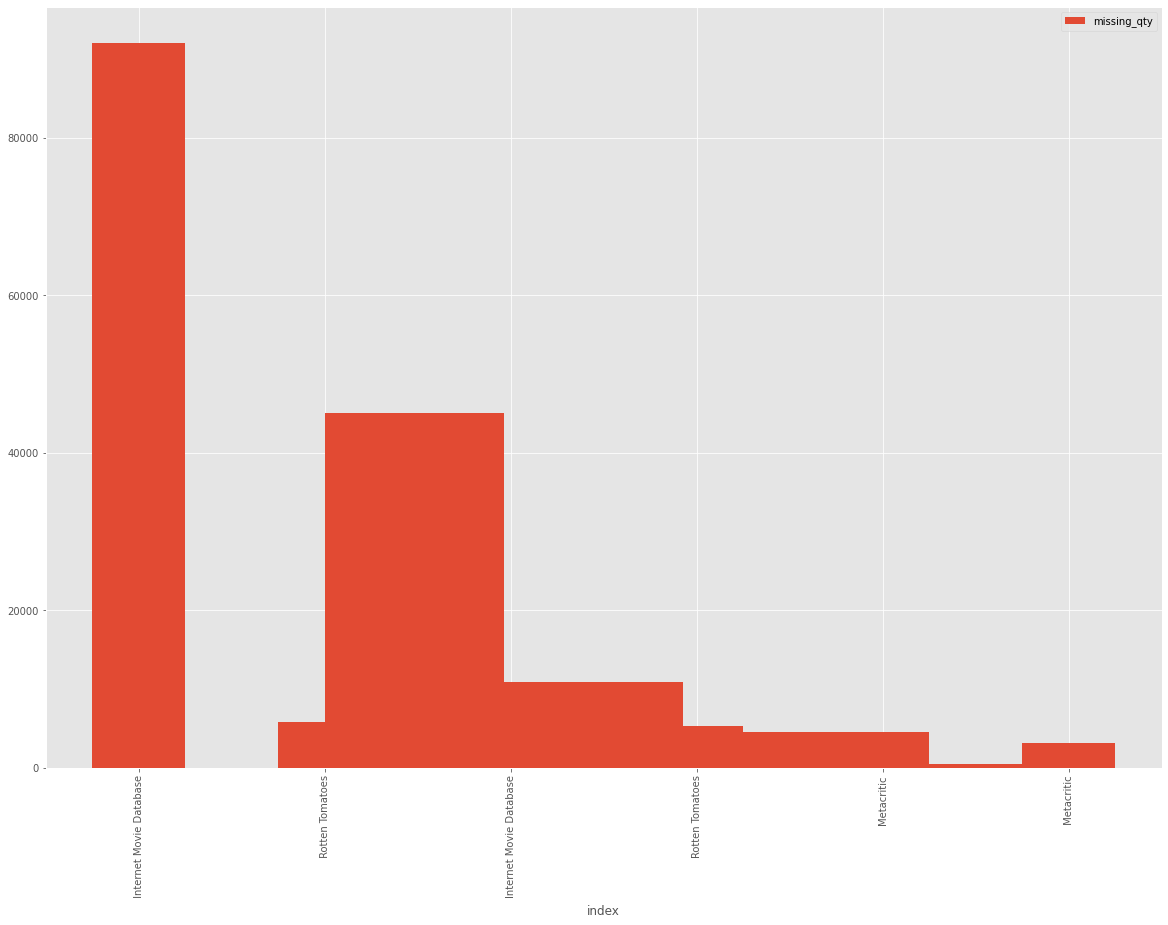

In [7]:
DataframeHelper.get_overview(ratings_df, 'ratings')
DataframeHelper.get_report(ratings_df, 'ratings', heatmap=False)
# SeriesHelper.report_on_column(ratings_df.Rating, bar=False)
SeriesHelper.report_on_column(ratings_df.RatingSource, bar=True)
ratings_df.imdbID.is_unique
ratings_copy = ratings_df.copy(deep=True)

ratings_copy = ratings_copy.groupby(ratings_df.imdbID.tolist(), as_index=False).size()
print(f'There are/is films that have been rated: {max(ratings_copy)} times\n')
print(f'Number of films rated: {ratings_copy.shape[0]}\n')
print(f'Number of films rated(%): {(ratings_copy.shape[0]/movies_df.shape[0])*100}\n')


print('Distribution of repeated rated movies:\nRated\tFilm')
print('-----------------------------------------------')
print(ratings_copy.value_counts().sort_values())
print('Example: 27 times have 1 movie been rated\n\n')

# Use the max number in the col as the bins=the amount bars used in histogram
print(ratings_copy.hist(bins=max(ratings_copy)))

# ratings_copy.imdbID.hist(by='index')

#### Ratings conlusions:
We can determine here that:
- It has 92.016 ratings(rows) and none seems to be missing
- there are only 62.394 movies that have been rated. Meaining only ~34% of films have ratings(total films 178.687)
- Rating scores comes in 3 different expresions which needs to be standardize
    imdb       = "9.2/1"
    rotten     = "25%"
    metacritic = "25/100"
- RatingSource comes three(3) different sites (Imdb, Rotten Tomatoes and Metacritic) and most of ratings (~80%) comes from imdb
- RatingSource also needs to be cleaned as it shows in the histogram that there are 6 site's sources, but each seems to be repeated twice

### 3. Genres

#################
###  genres  ###

Row quantity:  308565
Col quantity:  3
Col names:  ['Unnamed: 0' 'Genre' 'imdbID']
###
Types:  Unnamed: 0     int64
Genre         object
imdbID        object
dtype: object



#######################################
######  GENRES DATASET OVERVIEW  ######


###  Dataset overview - first 10 lines  ###

   Unnamed: 0        Genre     imdbID
0           0        short  tt2268369
1           1        drama  tt2268369
2           2        short  tt1560760
3           3        drama  tt1560760
4           4        drama  tt0016750
5           5      romance  tt0016750
6           6  documentary  tt3405286
7           7        short  tt3405286
8           8        short  tt3816698
9           9        drama  tt3816698



###########  Dataframe Report  ###########

Total rows: 308.565
Total cols: 3
-----------------------------------------------------------------------------------------
Column		Available(#)	Missing(#)	Available(%)	Missing(%)	Row Type
--------

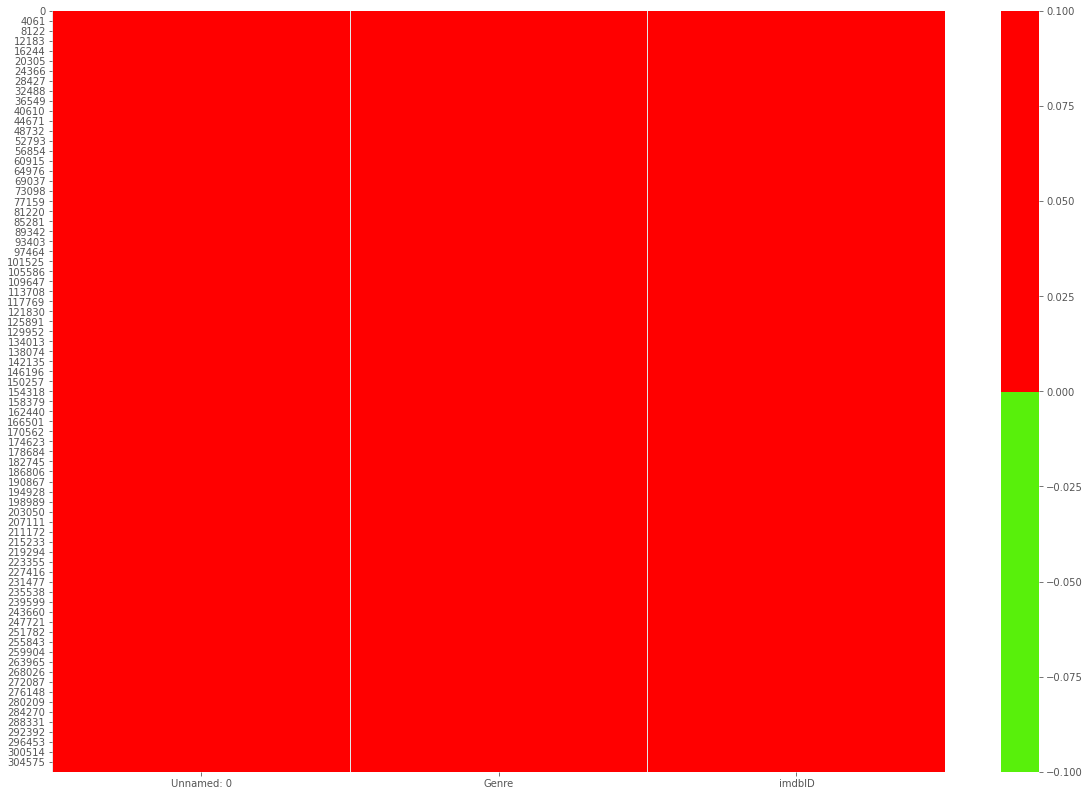

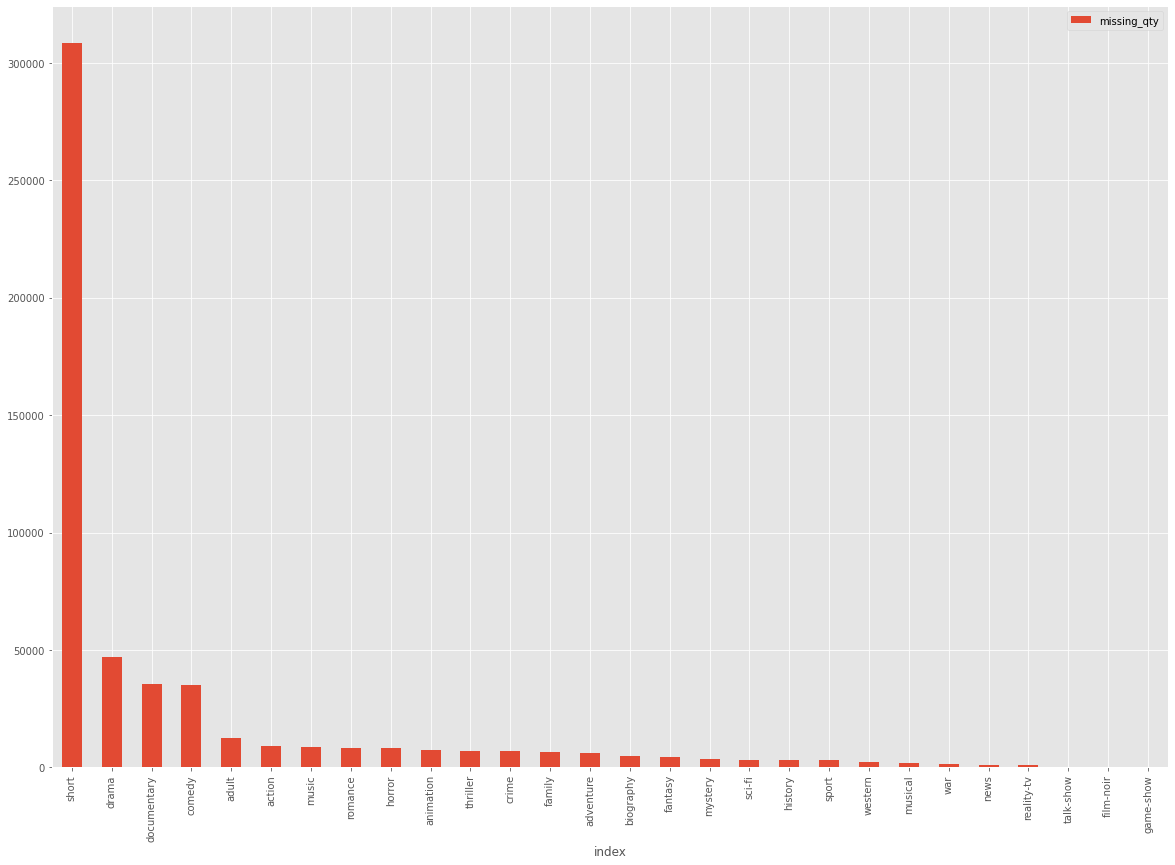

In [8]:
genres_df.Genre = genres_df.Genre.str.strip()
genres_df.Genre = genres_df.Genre.str.lower()

DataframeHelper.get_overview(genres_df, 'genres')
DataframeHelper.get_report(genres_df, 'genres', heatmap=True)
SeriesHelper.report_on_column(genres_df.Genre, bar=True)


#### Genre conlusions:
We can determine here that:
- It has 308.565 entries(rows) and none seems to be missing
- Genre name needs to be cleaned as it appears to be repeated due to leading whitespaces
- the most films produced genre seems to be
    1st place: Short, Drama, Documentary and Comedy
    2nd place: Adult, Action, Music, Romance ....
- least produced movies genres
    Game-show, fiml-noir, talk-show, reality-tv


### 4. Actors

#################
###  actors  ###

Row quantity:  143869
Col quantity:  3
Col names:  ['Unnamed: 0' 'Actors' 'imdbID']
###
Types:  Unnamed: 0     int64
Actors        object
imdbID        object
dtype: object



#######################################
######  ACTORS DATASET OVERVIEW  ######


###  Dataset overview - first 50 lines  ###

        Unnamed: 0                       Actors     imdbID
123411      154129              !Nqate Xqamxebe  tt0262452
48468        60609         'Baby' Carmen De Rue  tt0008144
41309        51657         'Baby' Carmen De Rue  tt0007669
30639        38305         'Baby' Carmen De Rue  tt0456736
25619        32031             'El Chefo' Elías  tt1795668
119243      148954   'Fido' Guido De Vincentiis  tt1886595
35852        44809                'Kewpie' Ross  tt0452484
22965        28687                'Kewpie' Ross  tt0467261
127469      159228                'Kewpie' Ross  tt0433228
32885        41102                'Kewpie' Ross  tt0434562
46005       

 Charles Brandt		5	0.0
 James Franco		5	0.0
Isadar		5	0.0
 Jackie Moore		5	0.0
 Carrie Underwood		5	0.0
 Marisa Tomei		5	0.0
 Queen Elizabeth II		5	0.0
 Brian Cox		5	0.0
William Shatner		5	0.0
 Jack Morgan		5	0.0
 Robert Kerman		5	0.0
 Frances Sternhagen		5	0.0
 Jayden Jaymes		5	0.0
 Mary Pickford		5	0.0
 Rodrigo Santoro		5	0.0
Dayton Allen		5	0.0
 Kelly Slater		5	0.0
 Patrick Stewart		5	0.0
 Martin Kove		5	0.0
 Rebecca St. James		5	0.0
 Merta Sterling		5	0.0
 Claire Adams		5	0.0
 Joe Harris		5	0.0
 Paul Obazele		5	0.0
 Anthony LaPaglia		5	0.0
 Samantha Mathis		5	0.0
Susan Sarandon		5	0.0
 Harry Keenan		5	0.0
 Gwen Diamond		5	0.0
Jennifer Love Hewitt		5	0.0
 Andy Devine		5	0.0
 Jake Steed		5	0.0
 James Mason		5	0.0
 Carolyn Monroe		5	0.0
 J. Carrol Naish		5	0.0
 Saint Obi		5	0.0
 Corbin Bernsen		5	0.0
 Mia Farrow		5	0.0
William Booth		5	0.0
 Ian Hunter		5	0.0
 Jean Debucourt		5	0.0
 Lena Nicole		5	0.0
 Brother Marquis		5	0.0
 Eucharia-Anunobi Ekwu		5	0.0
 Lucien Littlefield		5	0.0
 Liz

 Leslie Mann		3	0.0
 Grant Mitchell		3	0.0
Lisa Nunziella		3	0.0
 Willis Robards		3	0.0
 Roy Rogers		3	0.0
 Megan		3	0.0
 Joachim Hansen		3	0.0
 Sienna West		3	0.0
Sting		3	0.0
 Anthony Daniels		3	0.0
Nelly Mazloum		3	0.0
 Diana Rigg		3	0.0
 Yann Trégouët		3	0.0
 Timothy V. Murphy		3	0.0
 Crissy Moran		3	0.0
 Aaron Wilcox		3	0.0
 Jack Nelson		3	0.0
 Donnell Rawlings		3	0.0
Catriona MacColl		3	0.0
 Chris Wiggins		3	0.0
 Mary-Kate Olsen		3	0.0
 Lina Romay		3	0.0
 Laurie Smith		3	0.0
 Christina Roman		3	0.0
Ray Bradbury		3	0.0
 Ashley Nicole		3	0.0
 Ned La Salle		3	0.0
 Patricia Ellis		3	0.0
 Jo Brand		3	0.0
 Terry Camilleri		3	0.0
 Dana Salah		3	0.0
 Anita Dobson		3	0.0
 David Twohy		3	0.0
Yannick Joseph Boulanger		3	0.0
 David Alexander		3	0.0
 Richard Benjamin		3	0.0
 Lino Banfi		3	0.0
 Mia		3	0.0
 Fred Ward		3	0.0
 Liza		3	0.0
 Quentin Tarantino		3	0.0
 Daisy Layne		3	0.0
 Barry Shabaka Henley		3	0.0
 Gwendolyn Pates		3	0.0
 Dem Radulescu		3	0.0
 Pauline Starke		3	0.0
 Tsuyoshi Kusana

Brox Sisters		2	0.0
 Charles Heung		2	0.0
 Michael Maher		2	0.0
 Dick Foran		2	0.0
 Willie Hill		2	0.0
 Minnie Prince		2	0.0
 Mike Campbell		2	0.0
 Jodi Lyn O'Keefe		2	0.0
 Jeff Bryan Davis		2	0.0
 Sarah Jessica Parker		2	0.0
 Jonathan Ross		2	0.0
Michael Fassbender		2	0.0
 Charlie		2	0.0
 Josephine Siao		2	0.0
 Wallace Shawn		2	0.0
 Chun Chin		2	0.0
 David Burns		2	0.0
 Nicholas Stribakos		2	0.0
 Bettina		2	0.0
 Nadira Omran		2	0.0
 John Carson		2	0.0
 Gérard Jugnot		2	0.0
 Jason Rose		2	0.0
 Nick Searcy		2	0.0
 Rick Warren		2	0.0
 Veronica Sinclair		2	0.0
 Jean-Marie Straub		2	0.0
 Chloe Smith		2	0.0
 Alan Foster		2	0.0
 Talyn Stone		2	0.0
 Jeff Stern		2	0.0
 Annetta Ripamonti		2	0.0
Harry Buss		2	0.0
John Slater		2	0.0
 Franca Gonella		2	0.0
 Brent Lydic		2	0.0
 Kyle Phillips		2	0.0
 Brooke Lewis		2	0.0
 Charles Rock		2	0.0
 Earl Hindman		2	0.0
 Thelma Todd		2	0.0
 Troy Halverson		2	0.0
David Brierly		2	0.0
 Anthony Warde		2	0.0
 Jon Polito		2	0.0
 Terence Alexander		2	0.0
 Brandon 

 Cesare Bettarini		2	0.0
 Melanie Griffith		2	0.0
 Justin Rose		2	0.0
 Jacques Denis		2	0.0
 Magnus Sveningsson		2	0.0
 Lily Broberg		2	0.0
 Jaromír Hanzlík		2	0.0
 Shanna Malcolm		2	0.0
 Xin Xin Xiong		2	0.0
 Kelly Jaye		2	0.0
 Iva Hasperger		2	0.0
 Omar El-Hariri		2	0.0
 Frank Anthony		2	0.0
 Grace Yang		2	0.0
 Wesley Thompson		2	0.0
 Pete Lipins		2	0.0
 Bree Woodill		2	0.0
 Will Gluck		2	0.0
Bryan Adams		2	0.0
 Fern Emmett		2	0.0
 Nicole D. Hodges		2	0.0
 Alli Rae		2	0.0
 Mary McNany		2	0.0
 Natalie Kingston		2	0.0
 Scott Avery		2	0.0
 Hassan Assad		2	0.0
 Chris Degner		2	0.0
 Mike C. Manning		2	0.0
 Jesse White		2	0.0
 Robyn Hunter		2	0.0
 Summer Taylor		2	0.0
 Mel Hayward		2	0.0
 Alexis Texas		2	0.0
 Alex LeMonde		2	0.0
 Alana Tranter		2	0.0
 Allyssa Hall		2	0.0
 Kimberly Rowe		2	0.0
 Quinn Gilly		2	0.0
 Judith Light		2	0.0
 Abdelkrim Bahloul		2	0.0
 Bojana Novakovic		2	0.0
 Jake Pitts		2	0.0
 The Jonas Brothers		2	0.0
 Kelly Fire		2	0.0
 Steve Taylor		2	0.0
 Valeriy Solomakhin		2

 Jason Richards		2	0.0
 Wayne Collins		2	0.0
 Joey Maramba		2	0.0
 Stephen Dorff		2	0.0
 Esko Nikkari		2	0.0
 Antonello Fassari		2	0.0
 Melinda Browne		2	0.0
Sanma Akashiya		2	0.0
 J. Strokes		2	0.0
 Jack Palance		2	0.0
 Kimberly Chambers		2	0.0
 Clark Gable		2	0.0
 Justin Pierce		2	0.0
 Alexander Wraith		2	0.0
 Robert Cummings		2	0.0
 Paul Rodgers		2	0.0
 John Ennis		2	0.0
 Richard Durden		2	0.0
 Melissa Martin		2	0.0
Roy Firestone		2	0.0
 Darryl Hickman		2	0.0
 Will Clark		2	0.0
 Nyrobi Knight		2	0.0
 Athena Pleasures		2	0.0
 Victoria Mullen		2	0.0
 Corey Miller		2	0.0
 Mandy Miller		2	0.0
 Dave Bobb		2	0.0
 Jennifer Wright		2	0.0
 Yuki Sakurai		2	0.0
 Pelin Akil		2	0.0
 Timothy Stack		2	0.0
Waldemar Januzczak		2	0.0
 Sally Vahle		2	0.0
Sam Macaroni		2	0.0
 Suchao Pongwilai		2	0.0
 Kelly Poole		2	0.0
 Kyle Catlett		2	0.0
 Akiva Goldsman		2	0.0
 Lou Jacobi		2	0.0
 Andrea Cano		2	0.0
 Marief Guittier		2	0.0
 Mary Kay Bergman		2	0.0
 Europe DiChan		2	0.0
 Dick James		2	0.0
 Jack Perrin	

 Helen Shaver		2	0.0
 Nick Jonas		2	0.0
 Tova Leigh		2	0.0
 Luc Wylder		2	0.0
 Sean McBride		2	0.0
H.R. Giger		2	0.0
Annie Leonard		2	0.0
 Teoni		2	0.0
Darwin Karr		2	0.0
 Ben Welden		2	0.0
 Arthur Tracy		2	0.0
 Jon Farhat		2	0.0
 Shin-jae Kim		2	0.0
 Gail O'Grady		2	0.0
 Carmen Kinsley		2	0.0
 Ida Galli		2	0.0
 John Doucette		2	0.0
 Montserrat Lombard		2	0.0
 Rosita Marstini		2	0.0
 Ikumi Nakagami		2	0.0
 Fernanda Negri Pouget		2	0.0
 David Newman		2	0.0
Tabitha Knight		2	0.0
 Arndt Schwering-Sohnrey		2	0.0
 Dan Katula		2	0.0
 Ken Anderson		2	0.0
 Müjgan Agrali		2	0.0
Emmylou Harris		2	0.0
 Paolo Scirea		2	0.0
 Carroll Baker		2	0.0
Jamie Theakston		2	0.0
 Randy Oglesby		2	0.0
 Buddy Messinger		2	0.0
 Hazel Deane		2	0.0
 Sandra Sanchez		2	0.0
 Sab Shimono		2	0.0
 L.M. Wells		2	0.0
 Sadie		2	0.0
Tommy Lewis		2	0.0
 Gerald S. O'Loughlin		2	0.0
 Tanya Clarke		2	0.0
 Dan Moriarty		2	0.0
Gabrielle Malate		2	0.0
Danuta Stenka		2	0.0
 Annette Crosbie		2	0.0
 Won-sang Park		2	0.0
David Ross		2

Danny Garcia		1	0.0
 Peggy Sweeney McDonald		1	0.0
 Craig Nigh		1	0.0
 Devin Simonson		1	0.0
 Laurence Chater		1	0.0
 Liliane Frey-Rohn		1	0.0
 Fredericke Menche		1	0.0
 Elodie Hursley		1	0.0
 Joanna Lowe		1	0.0
 Alex Shaw		1	0.0
 Jack Phelan		1	0.0
 D. Jesse Damazo		1	0.0
 Jenn Lewis		1	0.0
 Phoebe Leonard		1	0.0
 Mommy Marte		1	0.0
 Nancy Stone		1	0.0
 Teresa Gallagher		1	0.0
Nigel Hawthorne		1	0.0
 John Kap		1	0.0
 Ophelia Lovibond		1	0.0
 Jane Mortifee		1	0.0
 Saskia		1	0.0
 Victoria Wallace		1	0.0
 Nancy Montgomery		1	0.0
Paul Terry		1	0.0
 Eli Bildner		1	0.0
 Erynn Dalton		1	0.0
 Michael Hodgson		1	0.0
 Steven Ponce		1	0.0
 Dariel Justin Embry		1	0.0
 Steven Wright		1	0.0
 Bonnie Law		1	0.0
 Jan Dvorak		1	0.0
 Jaden Michael		1	0.0
Angus Benfield		1	0.0
 Mammootty		1	0.0
 Sergio Rey		1	0.0
 Arthur Jarrett		1	0.0
 Nancy Dussault		1	0.0
 Jamie Ferguson		1	0.0
 Beth Willis		1	0.0
Randall Park		1	0.0
Jason Roche		1	0.0
 Fabrizio Vidale		1	0.0
 Joop		1	0.0
 Joe Rubbo		1	0.0
 Farrah Mac

 Rumica Powers		1	0.0
Doug Cowell		1	0.0
 Ethan Marrell		1	0.0
 Luciano Martino		1	0.0
 Miguel Izaguirre		1	0.0
 Patrick Coffey		1	0.0
 Lauren Marie		1	0.0
 Ryaan Reynolds		1	0.0
Michael O'Keefe		1	0.0
 Utae Nakamura		1	0.0
 Harrison Steege		1	0.0
Austin Mahone		1	0.0
 Kim Lewid		1	0.0
 Gerald Teufel		1	0.0
 Vane Calvert		1	0.0
 Oscar Scott		1	0.0
 Isaac Money		1	0.0
Erica Crooks		1	0.0
 Andy Kindler		1	0.0
 Gonzalo Escudero		1	0.0
 Ana Lopes		1	0.0
Tokio Sasaki		1	0.0
 Vivian Lorrain		1	0.0
 John Bogush III		1	0.0
 Tim Ray		1	0.0
 Sasha Savage		1	0.0
 Ian Teng		1	0.0
Fyodor Kurikhin		1	0.0
 Sonny Shroyer		1	0.0
 Madeline Kruse		1	0.0
 David Salles		1	0.0
 Rachel Sydney		1	0.0
 DeVon Franklin		1	0.0
Barry Morgan		1	0.0
 Nathalie Söderqvist		1	0.0
 Robert Driveman		1	0.0
 Virginia Woodruff		1	0.0
 Deborah Jensen		1	0.0
 Elarica Johnson		1	0.0
 Chelsea Connell		1	0.0
Alicia Boone		1	0.0
 Karl Lucas		1	0.0
The Puzzled Townsfolk of Nederland Colorado		1	0.0
 Sheila Stone		1	0.0
 Gisella Bu

 Claire Corbey		1	0.0
David Heine		1	0.0
 Eunice Muñoz		1	0.0
 Kenneth Bianchi		1	0.0
Wojtek Sieczek		1	0.0
Max Ernst		1	0.0
 Christopher Brown		1	0.0
 Ricky D. Nelson		1	0.0
 Junior Montgomery		1	0.0
Joo Hyup Lee		1	0.0
 Serena Marcus		1	0.0
 O.C. Smith		1	0.0
 Glenn Hansen		1	0.0
 Nick Noyes		1	0.0
 Eloise Willard		1	0.0
 Mirjam Donáth		1	0.0
 Susan Whitch		1	0.0
 Robert Silveira		1	0.0
 Krystal Rae		1	0.0
 Anthony Johnson		1	0.0
 Jack Daripper		1	0.0
 Trevor Daley		1	0.0
Dan Levy		1	0.0
 Toshiya Nagasawa		1	0.0
 Joe Machado		1	0.0
 Jesse Turits		1	0.0
 Azhy Robertson		1	0.0
 Jean-François Julliard		1	0.0
 Dick Stampolis		1	0.0
 Robyn Kopp		1	0.0
Nelly Castillo		1	0.0
Edwin R. Phillips		1	0.0
Joann Sfar		1	0.0
Wynter Kullman		1	0.0
 Mareva Gillioz		1	0.0
 Darlanne Fluegel		1	0.0
 Michelle Pascarella		1	0.0
 Katrin Heinrich		1	0.0
 Woody Leafer		1	0.0
 Richard Farrell		1	0.0
 Thomas Sullivan		1	0.0
 Sara Nunez		1	0.0
 Victor del Mar		1	0.0
 Paul Fox		1	0.0
 C. Jo Vela		1	0.0
 Adrienne

 Gary W. Miller		1	0.0
Landen Wakil		1	0.0
 Tom McLeod		1	0.0
 Victoria Abril		1	0.0
 Don Dubbins		1	0.0
 Jeffrey Lacohn		1	0.0
 Nico Rienzi		1	0.0
 Corianna Di Julio		1	0.0
 Madeleine Herrisson-Leplae		1	0.0
 Page Johnson		1	0.0
 Bruno Langley		1	0.0
 Arlene DeMarco		1	0.0
 James Larkin		1	0.0
 Ethyle Cooke		1	0.0
 Bessie Buskirk		1	0.0
 Carmen Villena		1	0.0
 Aaron Ward		1	0.0
 Rita Rivera		1	0.0
 Bailey Montaine		1	0.0
Lilyan Chauvin		1	0.0
 Steve Trypuc		1	0.0
 Alfred Harford		1	0.0
 Elysia Richards		1	0.0
 Bjorn Yearwood		1	0.0
 Dimitri Aronis		1	0.0
 Yeong-hie Na		1	0.0
 Ayo Sorrells		1	0.0
Claudina Montenegro		1	0.0
 Nancy Wu		1	0.0
 Jennifer Baute		1	0.0
Steve Merge		1	0.0
 Liz Fraser		1	0.0
Jillian Gross		1	0.0
 Felix Tipper		1	0.0
 David Gauntlett		1	0.0
 Marklen Kennedy		1	0.0
Elspeth Ballantyne		1	0.0
 Nikolai Garin		1	0.0
Nuria López		1	0.0
 Matthew Faber		1	0.0
Jana Vanková		1	0.0
 Wallop Terathong		1	0.0
 William L. Thorne		1	0.0
 Peter Chandler		1	0.0
 Steve Hewitt		1	0

Lynne Lori		1	0.0
 Jimmy Makulis		1	0.0
 Doug Williams		1	0.0
 Ramón Vallarino		1	0.0
 Menelaos Daflos		1	0.0
Paavo Pentikäinen		1	0.0
 Becky Suttle		1	0.0
Michael Denk		1	0.0
 Sarah Lind		1	0.0
 David Rickabaugh		1	0.0
 David Quiroz		1	0.0
 Piet Romam		1	0.0
 Nicolas Buysse		1	0.0
 Danielle Jacobs		1	0.0
 Ronin Wong		1	0.0
 Milagros Chacon		1	0.0
 Caroline Jones		1	0.0
Dru Berrymore		1	0.0
 Fatma Özkaya		1	0.0
 Sanae Nakahara		1	0.0
 Katie Cassidy		1	0.0
The Ingenues		1	0.0
 Summer Pleazure		1	0.0
Macleish Day		1	0.0
 Veronique Blanc Meyere		1	0.0
 Vis Brown		1	0.0
Jimmy Rosenberg		1	0.0
Larry Costa		1	0.0
Ryan Lee		1	0.0
 Phoenix Harper		1	0.0
 Rolan Bykov		1	0.0
 Kevin Whately		1	0.0
 Nolan Dunbar		1	0.0
 Kerry Leigh Pittenger		1	0.0
Sarah Heveron-Smith		1	0.0
 Rafael Andriolo		1	0.0
 Patricia Morán		1	0.0
 Kinsey Diment		1	0.0
 Jason Kelly		1	0.0
 Leandro Garcia		1	0.0
 Maria del Mar		1	0.0
 George Santino		1	0.0
 Allyson Mitchell		1	0.0
Josh Watson		1	0.0
 Amos Cowson		1	0.0
 Davi

 Maribel Costa		1	0.0
 Phillip King		1	0.0
 Natsumi Kamata		1	0.0
 Diedrich Bader		1	0.0
John Henley		1	0.0
 Chick Reid		1	0.0
 Sola Fosudo		1	0.0
 James Donnelly		1	0.0
 Clément Huet		1	0.0
 Jarz Ino		1	0.0
 Eliska S.		1	0.0
 Ella Wahlestedt		1	0.0
 Michael Bingham		1	0.0
 Jessie Mae Hemphill		1	0.0
 Denise Bryer		1	0.0
Frank Lanning		1	0.0
Paul Hunt		1	0.0
 Ashley Fiolek		1	0.0
 Caspar Delibes		1	0.0
Drake Bell		1	0.0
 Shammi		1	0.0
 Romina Carrisi Power		1	0.0
Jonathan Hardy		1	0.0
 Otep Shamaya		1	0.0
 Christopher L. Antie		1	0.0
José Antonio Hergueta		1	0.0
 Sydney Francis		1	0.0
 Shiro Akehi		1	0.0
 Kat Banyard		1	0.0
 James Blanshard		1	0.0
 Harriet Halfhead		1	0.0
Jack Dempsey		1	0.0
 Michael Getlin		1	0.0
 Alida Rosano		1	0.0
 John May		1	0.0
 Isamu Nagato		1	0.0
 Forrest Matthews		1	0.0
 Kiersten Shupe		1	0.0
Akif Turan		1	0.0
 Richlopez		1	0.0
Dan Lewk		1	0.0
Cassidy Campbell		1	0.0
 Larissa Kasian		1	0.0
 Linda Hamil		1	0.0
 James Hetfield		1	0.0
 Orlando Cruz		1	0.0
 David

 Alfred Haase		1	0.0
 Carlos Saldana		1	0.0
 Dmitry Krivoschapov		1	0.0
 Andhika Gumilang		1	0.0
 Lana Clarkson		1	0.0
Esin Varan		1	0.0
 Simon Oakland		1	0.0
James Mason		1	0.0
 Alexy Burg		1	0.0
 Tiffany Denise Mitchenor		1	0.0
Jared Brown		1	0.0
 Ty Garrett		1	0.0
 Adam Ramirez		1	0.0
 Narine Grigoryan		1	0.0
 Dana Burck		1	0.0
 Rod Janzen		1	0.0
 Scott Place		1	0.0
 Vanni Marcoux		1	0.0
 Ben Sanchez		1	0.0
 Veronica Brazil		1	0.0
 Katerna Robova		1	0.0
 Victor Aviles		1	0.0
Peter Jones		1	0.0
 Vladislav Krivenchuk		1	0.0
Tian Wang		1	0.0
 Garou		1	0.0
 Chartchai Ngamsan		1	0.0
 Tedd Taskey		1	0.0
 Larry Keeling		1	0.0
 Alessio Fiorentini		1	0.0
 Casey Ponce		1	0.0
 Angela Bifulco		1	0.0
 Linus Nord		1	0.0
 Lauren Galley		1	0.0
 Fred Aresoma		1	0.0
 Baby Pozzi		1	0.0
 Fernando Garcia		1	0.0
 Anthony Miller		1	0.0
 Derek		1	0.0
 Brian Reynolds		1	0.0
 Randall Maxxon		1	0.0
 Manfred Blank		1	0.0
 Karl Kwiatkowski		1	0.0
 Sugar Shane		1	0.0
 Aurielee Summers		1	0.0
 Susan Catt		1	0.0
P

 Charles S. Doucet		1	0.0
 Ryô Shinoda		1	0.0
Rodger Larance		1	0.0
 Julia Rosenow		1	0.0
 Peri Jill Phillips		1	0.0
Jillian Clare		1	0.0
 Benedict Johnson		1	0.0
 Oleg Smirnoff		1	0.0
 Dal-su Oh		1	0.0
 Maura Ryan		1	0.0
Boris Melikhov		1	0.0
 Karina Wolfe		1	0.0
 Ryan Gesell		1	0.0
 Sascha Ghafoor		1	0.0
 Gang Jin		1	0.0
 George Rose		1	0.0
 Ruben Paul		1	0.0
 Farid Zarif		1	0.0
 Anastasiya Dontsova		1	0.0
 Silvana Fallisi		1	0.0
 Alan Rowe Kelly		1	0.0
 Dave Stein		1	0.0
 Jesse G. Louis		1	0.0
Mikhail Firer		1	0.0
Harry Cartwright		1	0.0
 Deb Victa		1	0.0
 Norman		1	0.0
 Louis Ngabonziza		1	0.0
 Doug Suiter		1	0.0
 Richard Rupp		1	0.0
 Michelle Hare		1	0.0
 Alexander Wardach		1	0.0
 Vivi Kaparou		1	0.0
 John Latham		1	0.0
 Jeremy Drake		1	0.0
 Carley Smale		1	0.0
 Nigel Bennett		1	0.0
 Elliot O'Reilly		1	0.0
 Eric Riley		1	0.0
 Emmy Raabe-Burg		1	0.0
 Alberto Rojas Apel		1	0.0
Tony Aboyantz		1	0.0
 Dan Aaron Ramnarong		1	0.0
 Emilio Ghione		1	0.0
 Diana Laurie		1	0.0
 Reza Kianian		

 Anthony McKay		1	0.0
 Tânia Pires		1	0.0
 Vanessa Brannan		1	0.0
 Jean Louisa Kelly		1	0.0
Ranjan Mitra		1	0.0
 Misha Gonz-Cirkl		1	0.0
 Carol Cummings		1	0.0
 Alexis Greco		1	0.0
 Il-seob Baek		1	0.0
 Vincent Ortega		1	0.0
 Nathan Hoare		1	0.0
 James Cassady		1	0.0
 Angelina Crow		1	0.0
 Phil Smith		1	0.0
 Chris Nowland		1	0.0
 Marco Patino		1	0.0
 Marisa Serrano		1	0.0
Tuskegee Airman Calvin G. Moret		1	0.0
 Roxy Foxx		1	0.0
 Gautam Tanwar		1	0.0
Phillip Mulhern		1	0.0
 Jacques Slade		1	0.0
 Aurea Jolly		1	0.0
 Matthew Fowler		1	0.0
 Dana Deaux		1	0.0
 Eric Hastings		1	0.0
 Dusty Sorg		1	0.0
 John Wilkinson		1	0.0
 Isabel Kao		1	0.0
Nicholas Liepman		1	0.0
 Chris Eastland		1	0.0
Jade Asha		1	0.0
 Christina Scherer		1	0.0
 DJ Basher		1	0.0
 Wanette Tanner		1	0.0
 Omar Scott Benjamin		1	0.0
 Janice Fisher		1	0.0
 Jennifer Alexis Smith		1	0.0
Kibriyaa Morgan		1	0.0
 Riley Thomas Stewart		1	0.0
 Elleke Boehmer		1	0.0
Lucy Cottrell		1	0.0
Vladislav Krivenchuk		1	0.0
 José Lewgoy		1	0.0
 

 Frida Luqueno		1	0.0
 Andrea Constand		1	0.0
 Michael Denk		1	0.0
Eli Faes		1	0.0
 Chanel Marriott		1	0.0
 Jasper Paas		1	0.0
 Julio		1	0.0
 Hirokazu Oouchi		1	0.0
 Gary Bender		1	0.0
 Tammy Tavares		1	0.0
Robert Peacock		1	0.0
 William Tempel		1	0.0
 Evan Smith		1	0.0
 Neal Kelley		1	0.0
Clare Cowen		1	0.0
 Minnie Gonzalez		1	0.0
 Kevin Roche		1	0.0
 Aretha Perry Greene		1	0.0
 Jenn Wehrung		1	0.0
 Eaton Lu		1	0.0
 Jerry Jeff Walker		1	0.0
Christopher Moore		1	0.0
 Lewis Stringer		1	0.0
 Gorm Schmidt		1	0.0
 Master Frank Trejo Urguidez		1	0.0
 Sparkie Clarke		1	0.0
 Victoria Slim		1	0.0
 Kyle Becker		1	0.0
 Porno Ralle		1	0.0
 Paul Mann		1	0.0
 Jack Quaid		1	0.0
 Rudolf Nureyev		1	0.0
 Cher Rue		1	0.0
 Carol Littleton		1	0.0
 Garland Thompson		1	0.0
 Daisy Bevan		1	0.0
 Jennice Carter		1	0.0
Geneviève Gilles		1	0.0
Luis Moreno-Ocampo		1	0.0
 Keren Ben Rafael		1	0.0
 Tammy Barboza		1	0.0
 Cyrus Soliman		1	0.0
 Chris Colombo		1	0.0
 Charleen McCrory		1	0.0
 Mary Conwell		1	0.0
Michael 

Buffy Davis		1	0.0
 Beth Bautista		1	0.0
 Doug Phillips		1	0.0
 Norman Furr		1	0.0
 Aron Tager		1	0.0
 Sharon Kwon		1	0.0
 Choi Ah-ra		1	0.0
Sam Taylor		1	0.0
 Cristie Blazer		1	0.0
 Khodus Wadia		1	0.0
 Sean Faris		1	0.0
 Nicole Ladonne Knowles		1	0.0
 Seth Camillo		1	0.0
 Renda Carr		1	0.0
 Lubomír Paulovic		1	0.0
 Alison O'Rouke		1	0.0
 Robert G. Silverman		1	0.0
 Kirsten Deutschle		1	0.0
 Alexandra Wilson		1	0.0
 Edith Roarke		1	0.0
Kylie Ireland		1	0.0
 Georgina Ridealgh		1	0.0
 Francois van Coke		1	0.0
 JoMarie Payton		1	0.0
 Joshua Sienkiewicz		1	0.0
Jonny Spurling		1	0.0
 Vince Clark		1	0.0
 Jude Tedmori		1	0.0
 Ciak Martino		1	0.0
 Gage Golightly		1	0.0
 Vanessa Scott Lee		1	0.0
 Cinamon Romers		1	0.0
 Atte Pulkkinen		1	0.0
 Kyoung-In Hong		1	0.0
 Jivko Juranov		1	0.0
 Mary Looram		1	0.0
 Vincent Walsh		1	0.0
 Patrick Koehle		1	0.0
 Kyla Flatley		1	0.0
 Fabienne Babe		1	0.0
 Ed Mantell		1	0.0
John Weaver		1	0.0
 Jean Poilu		1	0.0
 June Harvest		1	0.0
 Arthur M. Petersen		1	0.0

 Anna-Louise Lefèvre		1	0.0
Eric Seligson		1	0.0
 Lorn Eisen		1	0.0
 Dudley Hill		1	0.0
Toby Dawson		1	0.0
 Hayden Livesay		1	0.0
Samantha Long		1	0.0
Jordan Knapp		1	0.0
 John Zoller		1	0.0
 Danijel Artenjak		1	0.0
 Rodney Smith		1	0.0
Sam T. Poluski		1	0.0
 Vivi Whalen		1	0.0
 Michael Günther		1	0.0
 Amandla Stenberg		1	0.0
 Masha King		1	0.0
 Cliff Yates		1	0.0
 Gene Connelly		1	0.0
 Jean Stapleton		1	0.0
 Gordon Jackson		1	0.0
 Christina Rivera		1	0.0
 Nina Weiss		1	0.0
 María Albiñana		1	0.0
Dean Jagger		1	0.0
 Reiko Hayama		1	0.0
 Qian Niu		1	0.0
 Susan Karsnick		1	0.0
 Laurie Burke		1	0.0
 Grace Hallows		1	0.0
 Sofía Vergara		1	0.0
 Jessica Harcourt		1	0.0
Paloma Zavala		1	0.0
 Marvin Muzarelli		1	0.0
 Roko Niksic		1	0.0
 Barry Lank		1	0.0
 Zack Peladeau		1	0.0
Mine Mine		1	0.0
 Charles Servaès		1	0.0
 Robyn Evans		1	0.0
 Lynn Wells		1	0.0
 David Eades		1	0.0
 Sally Davis		1	0.0
Sarah Moffitt		1	0.0
 Robert Lenigras		1	0.0
 Mark Nilsson		1	0.0
 Maricel Álvarez		1	0.0
Minhee Ahn	

 Andrée Pascal		1	0.0
 Freeman Williams		1	0.0
 Nika Aduashvili		1	0.0
 So-ri Moon		1	0.0
 Giannis Minadakis		1	0.0
 Hayley Hasselhoff		1	0.0
 Kan Hon		1	0.0
 Grace Fisher		1	0.0
 Henrik Reinert		1	0.0
 Elizabeth Raia		1	0.0
Tania Pisa		1	0.0
 Kate Horlor		1	0.0
 Inga Sparstad Nordbotten		1	0.0
 Audrey Herston		1	0.0
 Allen Velez		1	0.0
 David Swann		1	0.0
 Noriko Tsukase		1	0.0
 Victoria Justice		1	0.0
 Molly Saleen		1	0.0
 Sam Soghor		1	0.0
 Hainsley Lloyd Bennett		1	0.0
 Kevin Csolak		1	0.0
Daniela Oliveira		1	0.0
 Andrea Farnham		1	0.0
 Liz Coyle		1	0.0
 Kristina Kazlauskaite		1	0.0
 Jay Jay		1	0.0
 Leah Marie		1	0.0
 Johnny Dawes		1	0.0
 Vera Altayskaya		1	0.0
 Ji-Won Kang		1	0.0
 Kaysee Pilgrim		1	0.0
Yakov Smirnoff		1	0.0
 Cinnamon Creeden		1	0.0
 Victor Pytko		1	0.0
 Harry McNamara		1	0.0
 Petr Zelenka		1	0.0
 George Barr McCutcheon		1	0.0
 Tom Lind		1	0.0
 Leo Sprinkle		1	0.0
 Jeri Sullavan		1	0.0
Mike Park		1	0.0
 Jack Gaines		1	0.0
 Louis Seigner		1	0.0
 Lanny Thomas		1	0.0


 Robert Blesse		1	0.0
 Grace Bogaert		1	0.0
 Po Chih Leo		1	0.0
 Pooja Batra		1	0.0
 Anne Sofie von Otter		1	0.0
Claudio Zanna		1	0.0
Cardoso		1	0.0
 Miss Nelson		1	0.0
Victor Moore		1	0.0
Alex Essoe		1	0.0
Shubhen Joardar		1	0.0
 Ryszard Faron		1	0.0
 Melanie Clark Pullen		1	0.0
Eddy Brimson		1	0.0
 Conor Murphy		1	0.0
 Kiyoshirô Imawano		1	0.0
 Filipe Carvalho		1	0.0
Antonio Srado		1	0.0
Caelum Vatnsdal		1	0.0
Barry Callaghan		1	0.0
 John Logoifiti		1	0.0
Michael Van Peel		1	0.0
 Aaron Ginsburg		1	0.0
 Ann Sheridan		1	0.0
 Arron W. Haven		1	0.0
 David Cooley		1	0.0
 Rob Peacock		1	0.0
 Rebecca Clouse		1	0.0
 Jennifer Fontaine		1	0.0
 Florence Guérin		1	0.0
 Peter Singer		1	0.0
 Richard Yung		1	0.0
 Jeff Locker		1	0.0
 Laurent Capelluto		1	0.0
 Murray		1	0.0
 Ivo Palec		1	0.0
Sharon Henderson		1	0.0
 Tristan Mckinnon		1	0.0
 Gloria Dickson		1	0.0
 Robert Severson		1	0.0
 Calvin Dean		1	0.0
 Dallas Jaussi		1	0.0
 Christian Geissler		1	0.0
 Tony Ofori		1	0.0
 Lajos Tóth		1	0.0
Ardal O'H

 Mary Steige		1	0.0
 Mark Lijek		1	0.0
 William Holmes		1	0.0
 Karin Schubert		1	0.0
Mary Austin Speaker		1	0.0
 Maristella Diaz		1	0.0
 Anthony Candell		1	0.0
Mark L. Walberg		1	0.0
 Isabel de Castro		1	0.0
 Marco Daniele		1	0.0
 Paco Fuentes		1	0.0
 Ralph Weber		1	0.0
 Michael Weigel		1	0.0
 Cenker 'Jake' Sen		1	0.0
 Tara Bardot Jackson		1	0.0
 Liam Williams		1	0.0
 Coco Rae		1	0.0
Dan Miklos		1	0.0
 Adam Simon		1	0.0
 Matt Rolston		1	0.0
 Lisa Stretton		1	0.0
 Olivia Munn		1	0.0
Joanna Kosowsky Dane		1	0.0
 Akitsugi Moritsugi		1	0.0
 Anitra Zobeck		1	0.0
 Stuart Galbraith IV		1	0.0
Chloe Allen		1	0.0
 Chelan Simmons		1	0.0
 Ami Rogers		1	0.0
 Johnny Smith		1	0.0
 Shwe Thwe		1	0.0
 Marianna Palka		1	0.0
 Grant Costello		1	0.0
 Julie James		1	0.0
 Zhang Ying		1	0.0
 Kelly G'Raffe		1	0.0
 Michael Greger		1	0.0
 Fred Stoller		1	0.0
 Rosie Stokes		1	0.0
Anna Tenta		1	0.0
 Tony Curtis Blondell		1	0.0
 Thomas Michael		1	0.0
 Mike Brendli		1	0.0
 Dimitri Andreas		1	0.0
 Sabine Steli		1	0.0


 Benjamin Oliel		1	0.0
 Boris Novikov		1	0.0
 Ethan Bell		1	0.0
 Walter Bruno		1	0.0
 Harry Piaggio		1	0.0
 Martin Rutegård		1	0.0
 Kevin Cahill		1	0.0
 Karyn Cohen		1	0.0
 Micah Dargan-Coley		1	0.0
 Tracey Ellis		1	0.0
 James DeBello		1	0.0
Stacy Burke		1	0.0
 François Beukelaers		1	0.0
 Gilvan Rudge		1	0.0
 Keila hamilton		1	0.0
 Tatiana Milovani		1	0.0
 Nikolai Radov		1	0.0
 Kali Thomas		1	0.0
 Sachin Yashwante		1	0.0
 John Gourdoux		1	0.0
 Brandon Layne		1	0.0
 Reid Sullivan		1	0.0
 Dustin Strong		1	0.0
 Elisa Cohen		1	0.0
 Kingslee Purcell		1	0.0
 Cole Vigue		1	0.0
Nami Himemura		1	0.0
 Darma Burr		1	0.0
 Michiko Nomura		1	0.0
 Aniket Vishwasrao		1	0.0
 Texas Battle		1	0.0
 Mark Eden		1	0.0
Tony Dunham		1	0.0
 Sexxy		1	0.0
 Michael Kuya		1	0.0
 Natalia Tudge		1	0.0
 Tatsumi Hijikata		1	0.0
 Max Cady		1	0.0
 Nya Daigo		1	0.0
 Troy Anthony Miller		1	0.0
 Jo De Backer		1	0.0
Anna Pavlova		1	0.0
 Haven		1	0.0
 Mandi Mellen		1	0.0
Jack Stanley		1	0.0
 Cheryl Berg Wineman		1	0.0
 Mayrna

 Cassandra Betancourt		1	0.0
Arline Malakian		1	0.0
 Sofia Jellen		1	0.0
Nick J. Stone		1	0.0
 Felicity Steel		1	0.0
 Chanda Watts		1	0.0
 Kevin Louis White		1	0.0
 Phyllis Daniels		1	0.0
 Manuel Vasquez		1	0.0
 Viktoriya Tarasova		1	0.0
 James Kidnie		1	0.0
 Melanie Nelson		1	0.0
 Margot Eskens		1	0.0
 Pete Laney		1	0.0
 Glenda Araneta		1	0.0
 Yaov Berliner		1	0.0
 Curtis Karpe		1	0.0
 Donnie Otis Walters		1	0.0
 Sebastian Kadlecik		1	0.0
 Helena Datner		1	0.0
 Ashi Singhal		1	0.0
 Mohamed Tsouli		1	0.0
 Ian Spencer Holt		1	0.0
 Wellington Briggs		1	0.0
 John Brotherton		1	0.0
 Martin Laing		1	0.0
 Yinka Quadri		1	0.0
 Betsy Franco		1	0.0
David de Keyser		1	0.0
 Bishanyia Vincent		1	0.0
John Pack		1	0.0
 Zaid Martinez		1	0.0
 Philippe Richard		1	0.0
 Luc Pilon		1	0.0
Jon Seltzer		1	0.0
 Lindsay Broockman		1	0.0
Anthony Jacobs		1	0.0
Ethel Merman		1	0.0
 Ricky Tomlinson		1	0.0
 Ian Roberto		1	0.0
 Daniel Lyman		1	0.0
 Christiane Jansen		1	0.0
 Anthony Martinez		1	0.0
 Nolan Martin		1	0

 Deborah Prat		1	0.0
 Michelle Muller		1	0.0
 Maria Akgüllü		1	0.0
 Albert Petruccio		1	0.0
Brian Vander Ark		1	0.0
 Steph Mitchell		1	0.0
 Ron Sorci		1	0.0
 Steve Clark		1	0.0
 Richard Joo		1	0.0
 Mathé Mansoura		1	0.0
 Britney Diamond		1	0.0
 Cherry Go		1	0.0
 Shaun Boylan		1	0.0
 Janet May		1	0.0
 Juan Ushca		1	0.0
 Ryan Lampp		1	0.0
 Esther Maaß		1	0.0
 Auntie Di		1	0.0
 Sevinç Pekin		1	0.0
 Alejandro Fajardo		1	0.0
 Fred Hampton		1	0.0
 Kumiko Takizawa		1	0.0
 Pat Laffan		1	0.0
 Matthew Penn		1	0.0
Darwin Reina		1	0.0
 Lindsay Lucas-Bartlett		1	0.0
 Shirley Duke		1	0.0
 Opone Ese-en		1	0.0
 Ali Yazdani		1	0.0
 Cameron Scott		1	0.0
 Victor Campos		1	0.0
 Eleanor Thatcher		1	0.0
 Jason Deline		1	0.0
 Michael Skretting		1	0.0
 Tony Chiu Wai Leung		1	0.0
 Andre L. Maingot		1	0.0
Florence Williamson		1	0.0
 Nget Khun		1	0.0
 Lucky Johnson		1	0.0
 Adahy Varun		1	0.0
 Lou Scheimer		1	0.0
 Paul Le Person		1	0.0
 George Galloway		1	0.0
 Laura Singleton		1	0.0
 Jeb Stuart Adams		1	0.0
 Mari

 Rich Piatkowski		1	0.0
 Johnny Vallone		1	0.0
Ken Kipperman		1	0.0
 Travis Dixon		1	0.0
 Madison Moss		1	0.0
 Marlene Assmann		1	0.0
 Martynas Budraitis		1	0.0
 Jake M. Smith		1	0.0
 DuJuan Paxton		1	0.0
 Lars Lindberg		1	0.0
 Scott Keller		1	0.0
Esther Campbell		1	0.0
 Ashton Gates		1	0.0
 Cian Markey		1	0.0
 Arleta Bogunovic		1	0.0
 Efren Reyes Jr.		1	0.0
 Jeremy Davies		1	0.0
 Jacob Moskow		1	0.0
 Pierre Lebeau		1	0.0
Slavoj Zizek		1	0.0
 Mario Loya		1	0.0
 Christopher		1	0.0
 Carmine Paternoster		1	0.0
 Amanda Nahle		1	0.0
 Thomas Wodianka		1	0.0
 Yuzu		1	0.0
 Loni Leigh		1	0.0
 Marq English		1	0.0
 Shea Glover		1	0.0
 J'Koby Mack		1	0.0
 Robert Alda		1	0.0
Arianna Bailey		1	0.0
 Christopher Paul Carter		1	0.0
 Russell Costen		1	0.0
 Kelly Campbell		1	0.0
 Marc Kudisch		1	0.0
Tera Garnett		1	0.0
 Liz Cairns		1	0.0
Dominique LaFleur		1	0.0
 Marie Astaire		1	0.0
 David Grohl		1	0.0
 Zack Elias		1	0.0
 Daniel Prévost		1	0.0
 Kevin Krzemien		1	0.0
 Vera McGinnis		1	0.0
Jon Jon Aharoni

 Suzy Paradise		1	0.0
 Curtis LeMay		1	0.0
 Jessica McGoldrick		1	0.0
Nandini Goel		1	0.0
 Katie Wilbert		1	0.0
 Mourad		1	0.0
 Mario Feliciani		1	0.0
Kara Vedder		1	0.0
 Randy Tobin		1	0.0
 John Gegenhuber		1	0.0
 Kevin Lewis		1	0.0
 Noah Redondo		1	0.0
 Nancy Hochman		1	0.0
Jose Alejandro Acosta		1	0.0
 Scott Moffett		1	0.0
 Hunter Wood		1	0.0
 Tim Spector		1	0.0
 Robert G. Rodriguez		1	0.0
 Michael Schreinert		1	0.0
 Saakanush Vanyan		1	0.0
 Andi Morrow		1	0.0
Thompson Barton		1	0.0
 Nik Kash		1	0.0
 Sladjana Nestorovic-Ristic		1	0.0
 Jumaan Short		1	0.0
Melanie Bradshaw		1	0.0
 Anna Morell		1	0.0
 Pavan Daluvai		1	0.0
 Brian Brushwood		1	0.0
 Ming Lai		1	0.0
 Cristina Marcos		1	0.0
 Terry Gibbs		1	0.0
 Frances Gifford		1	0.0
 Amber Lenell Jones		1	0.0
 Richard B. Goodwin		1	0.0
Sylvia Froos		1	0.0
 Maren Eggert		1	0.0
Tom Ricketts		1	0.0
 Russell Milton		1	0.0
 Bryan Fitzgerald		1	0.0
Rick Rescorla		1	0.0
 Charlie Drake		1	0.0
 Joseph Lincoln		1	0.0
 Brandon Krzysztof		1	0.0
 Mitch

 Richard Brancatisano		1	0.0
 Monie Mon		1	0.0
Robert Fortier		1	0.0
 Jennifer Keller		1	0.0
 Suzanne Juchtmans		1	0.0
 Geert Vaes		1	0.0
 Manja Golec		1	0.0
 Michael Wexler		1	0.0
 Johnny Phyfe		1	0.0
 Trixie Smith		1	0.0
 Rahul Roy		1	0.0
Bill Clark		1	0.0
Joel Zimmerman		1	0.0
 Peter Knox		1	0.0
 Kat Rybarski		1	0.0
 Ermira Gjata		1	0.0
Bob Flag		1	0.0
 Monique Powell		1	0.0
 Jack Reynor		1	0.0
 Timothy Gaer		1	0.0
 Rodolfo Landa		1	0.0
 Jaecki Schwarz		1	0.0
 Andi Meyer		1	0.0
 Pico Alexander		1	0.0
 Mackenzie Smith		1	0.0
 Ahmed Elwahsh		1	0.0
 Tuovi Auvinen		1	0.0
 Monica Raymund		1	0.0
 Serge Ramelli		1	0.0
 John Gray		1	0.0
J.P. Gillain		1	0.0
 Charlie Jake Sanchez		1	0.0
 Sibylle Nicolai		1	0.0
 Mahesh Manjrekar		1	0.0
 Kim Tae-ri		1	0.0
 Dalton Farmer		1	0.0
 Gregory Kanter		1	0.0
 Eugene Enriquez		1	0.0
 Major Gordon W. 'Pawnee Bill' Lillie		1	0.0
 Merle Kennedy		1	0.0
 Anton Raukola		1	0.0
 Mehdi Kashani		1	0.0
 Kalonji Gilchrist		1	0.0
 Ringo Aoyama		1	0.0
 Bengaru		1	0.0


 Marcelle Géniat		1	0.0
 Tammy Isbell		1	0.0
 Dr. Luis Casavantes		1	0.0
 Azalea Lee		1	0.0
 Rose Mckenna		1	0.0
 Sebastian Kühne		1	0.0
 Joe Zastawny		1	0.0
 Keiko Venishi		1	0.0
 Paul Baumgartner		1	0.0
 Simone Devon		1	0.0
 Ben Wise		1	0.0
Adriana Victoria Lewi		1	0.0
 Ernesto Gatell		1	0.0
 Wilson Du Bois		1	0.0
 Vladimir Leshchenko		1	0.0
 Said Amrane		1	0.0
 Ralph W. Bell		1	0.0
 Alain Mottet		1	0.0
Sae Jin Lim		1	0.0
 Sarah Pidgeon		1	0.0
 Enver Petrovci		1	0.0
 Liliana Pagano		1	0.0
 Juan Espantaleón		1	0.0
 Louise Redknapp		1	0.0
 Dries Van Hegen		1	0.0
 Tina Tanzer		1	0.0
Laurie de Seguirant		1	0.0
 Weekend		1	0.0
 Kevin Dooley		1	0.0
 Paul Leques		1	0.0
Bart Meijer		1	0.0
 Irina Loseva		1	0.0
 Petronella Tóth		1	0.0
 Luzer Twersky		1	0.0
 Jordan McFadden		1	0.0
Linda Kosciewicz-Fleming		1	0.0
James Kavaz		1	0.0
 Pål Pot Pamparius		1	0.0
E.H. Gonatas		1	0.0
 Jaime Tirelli		1	0.0
 Julio Riscal		1	0.0
 Laura		1	0.0
 Joykierra Thurman		1	0.0
 Hubert Dreyfus		1	0.0
 Dave Zeoli		1

Jim Norton		1	0.0
 Freya Parsons		1	0.0
 Ana Mulvoy Ten		1	0.0
 Lesley Rausch		1	0.0
 Shôta Takasaki		1	0.0
 Taylor Nicole Adams		1	0.0
Ulay		1	0.0
 H. Agar Lyons		1	0.0
 Angelica Barrera		1	0.0
Jamie Kennedy		1	0.0
 Collin Place		1	0.0
 Ching-Shun Mao		1	0.0
Mike Settino		1	0.0
 Frederick Vyvyan Jones		1	0.0
Larry Laverty		1	0.0
 Taylor Hayes		1	0.0
 Francine Mitchell		1	0.0
Pat Rooney		1	0.0
 Susan Rhea Lynch		1	0.0
 Dizzy Gillespie		1	0.0
 Alex		1	0.0
 M.L. Morlock		1	0.0
 Mike Brislee		1	0.0
 Dan Christison		1	0.0
 Jennifer Delora		1	0.0
 Jeannie Franciscy		1	0.0
 Tissy Nnachi		1	0.0
 Anthony Van Engelen		1	0.0
 David Crist		1	0.0
 Bob Hyman		1	0.0
 Hilmar Baumann		1	0.0
 Barbara Feldon		1	0.0
 Douglas Caputo		1	0.0
 Romain Duris		1	0.0
 Christian Mulot		1	0.0
 Victor Gelikman		1	0.0
 Luis Peña		1	0.0
 Anita Lehtonen		1	0.0
 Hope Howell		1	0.0
Spyros Dimitrakopoulos		1	0.0
 Teig Rountree-Wilson		1	0.0
 Jim Cody Williams		1	0.0
 Velikov Veliko		1	0.0
 Ailing Huang		1	0.0
 Ervi Sirén

 Karl Johnsson		1	0.0
 Chung Kok Keong		1	0.0
 Petter Hägg		1	0.0
 Bob Marley		1	0.0
 David Reed		1	0.0
 George Odell		1	0.0
 Anna Easteden		1	0.0
 Rasha Miljkovich		1	0.0
Franco Castan		1	0.0
Janine Turner		1	0.0
Thomas Rushforth		1	0.0
 Gonçalo Santiago		1	0.0
 Zahiril Adzim		1	0.0
 Heather Shaw		1	0.0
 Elaine Victoria Grey		1	0.0
Brian Shactman		1	0.0
 Joe Ozier		1	0.0
 Louis M. Jason		1	0.0
 Buntarô Miura		1	0.0
 Mary Grace Canfield		1	0.0
 Michael P Gardner		1	0.0
 Luis Margani		1	0.0
 John Cameron		1	0.0
Kumari D'Shay		1	0.0
 Fuerza Guerrera		1	0.0
 Aaron Worley		1	0.0
Jacob Holdt		1	0.0
 Hala Schauket		1	0.0
 Katsuhisa Namase		1	0.0
 Peter Douglas		1	0.0
Dax Spanogle		1	0.0
 Lydia Watkins		1	0.0
 Denis West Payton		1	0.0
Nneka Egbuna		1	0.0
 Lorna O'Connell		1	0.0
 Jared van Heel		1	0.0
 Anna Popplewell		1	0.0
 Kelly Defayette		1	0.0
 Iris Avalee		1	0.0
 Carol St. Jacques		1	0.0
 Su-kyeong Jin		1	0.0
 Ute Lemper		1	0.0
 Sarah Teed		1	0.0
 Hailey Stroud		1	0.0
 Dennis Wyndham		1	

 Vicente Cano		1	0.0
 Jessie Ralph		1	0.0
 Min-Jung Bae		1	0.0
 Joe Biggins		1	0.0
 Gaja Servadio		1	0.0
Christopher Peterson		1	0.0
 Ryan Wieber		1	0.0
 Zelimir Zilnik		1	0.0
 Mariana Cordero		1	0.0
 Tom Biagini		1	0.0
R. Budd Dwyer		1	0.0
 Luis Cuenca		1	0.0
Gaston Acurio		1	0.0
 David August		1	0.0
 Sule Erhal		1	0.0
 Hannah Neurotica		1	0.0
 Ivetta Braszda		1	0.0
 Paula Hanlon		1	0.0
 Raef Bjayou		1	0.0
 Shigeki Kagemaru		1	0.0
 Amanda Ellison		1	0.0
 Evelyn Spillsbury		1	0.0
 Mac Smith		1	0.0
 William Human		1	0.0
 Solé Michaux		1	0.0
Scott Baker		1	0.0
 Kiia Huttula		1	0.0
 David Bockstael		1	0.0
 Alan Keyes		1	0.0
 Donald Wiegert		1	0.0
Helene Chadwick		1	0.0
 Jeffrey Charlton Umberger		1	0.0
 Kana Harada		1	0.0
 Robert Boin		1	0.0
Fay Tincher		1	0.0
 Kirti Rao		1	0.0
 Shun Chien		1	0.0
 Isabella Ventura		1	0.0
 Nick Mcleish		1	0.0
Aram Abbas		1	0.0
 Paul Leyden		1	0.0
 Giuliano Persico		1	0.0
 Michel-René Labelle		1	0.0
 Ben Stockman		1	0.0
 Greg Noll		1	0.0
 Ryan Harton		1	0.0

 Joe Mirelli		1	0.0
 Letitia Hector		1	0.0
 Emerson Treacy		1	0.0
 Andrew Gawley		1	0.0
 Ann-Marie Adamsson		1	0.0
 Peter Hooten		1	0.0
Darin Caudle		1	0.0
 Samir Hossein		1	0.0
Christopher Judge		1	0.0
 Charles Raintree		1	0.0
 Alex Horn		1	0.0
 Zara Whites		1	0.0
 Tanith Belbin		1	0.0
 Justin Chatwin		1	0.0
Eddie White		1	0.0
 Gary Chason		1	0.0
 June Daguiso		1	0.0
 Mark Richard Keith		1	0.0
 Sasa Pavlin Stosic		1	0.0
 Matt O'Gorman		1	0.0
Keith Gordon		1	0.0
 Elisa Lucinda		1	0.0
 Ramtin Mobbasseri		1	0.0
 Karchi Perlmann		1	0.0
 James Littlejohn		1	0.0
Bruce Stratton		1	0.0
 Péter Kálloy Molnár		1	0.0
 William Bray		1	0.0
 Robert McCollum		1	0.0
 Orsolya Tóth		1	0.0
 Bryce Shelby Olbert		1	0.0
 Sebastian Kleppe		1	0.0
 Marjorie O'Neil		1	0.0
 Madi Diaz-Svalgard		1	0.0
 Feng-Jiao Lin		1	0.0
 Tyler McVey		1	0.0
 Mark Brant		1	0.0
 Jimmy Reddington		1	0.0
 Tyger Hudson		1	0.0
 Lori Desiderio		1	0.0
 Colin Liddle		1	0.0
 Qing Feng Zhou		1	0.0
 Jarred Blancard		1	0.0
 Melinda Peinado		

 Eri Fuse		1	0.0
 Ellen Röhrman		1	0.0
 Christine Jansen		1	0.0
 Craig Scott Rosebraugh		1	0.0
 Sarantuya Sambuu		1	0.0
 Päivi Uitto		1	0.0
 Peter		1	0.0
 Brad Piccirillo		1	0.0
 Michael Kolts		1	0.0
 Chris D.		1	0.0
Lancelot Layne		1	0.0
 Logan Ramsey		1	0.0
 Tysonia Sichinga		1	0.0
Evelyn Hart		1	0.0
 Lisa Sugar		1	0.0
 Thomas Desny		1	0.0
Brian O'Sullivan		1	0.0
Peter Lee		1	0.0
 Nicola Campbell		1	0.0
 Carol Luna		1	0.0
 The Last Beer		1	0.0
 Shide Boss		1	0.0
 Zilda de Oliveira		1	0.0
 Doris Thomas		1	0.0
 Chris Hunter		1	0.0
 Martin Valihora		1	0.0
 Don Halbert		1	0.0
 Shuying Jiang		1	0.0
Miho Tono		1	0.0
 Rigg Kennedy		1	0.0
 Erik Strandmark		1	0.0
 Tim McArdle		1	0.0
 Peter Pertusini		1	0.0
 Basil Cunard		1	0.0
 The Brazz Brothers		1	0.0
 Vanesa Rendon		1	0.0
 Evan Holzman		1	0.0
 Notorious D		1	0.0
 Garance Marillier		1	0.0
 Kalindra Faria		1	0.0
 Raúl Velasco		1	0.0
 Marina Gera		1	0.0
 Charles Davis		1	0.0
 Aruray		1	0.0
 Micara		1	0.0
 Michael Marich		1	0.0
 Jason Etter		1

Ted Myers		1	0.0
 Nikki Tuazon		1	0.0
 Jeremy Shoesmith		1	0.0
 Rory Burton		1	0.0
 Sophie LaMontagne		1	0.0
 Mitch		1	0.0
 Juan Soler		1	0.0
 Luis Hernando Forero		1	0.0
 Anne Lilly		1	0.0
Ian Salmon		1	0.0
 Madyson Martin		1	0.0
 Kyoung-gu Sul		1	0.0
 Dariusz Chojnacki		1	0.0
 Patrick Gagné		1	0.0
 Jack Delyra		1	0.0
 Chris Gauthier		1	0.0
 Lee Khole		1	0.0
 Shay Jordan		1	0.0
 Sean Hughes		1	0.0
John Christmas Møller		1	0.0
Stephen Stills		1	0.0
 Abigail Hamilton		1	0.0
 Stephanie Barone		1	0.0
 Kalah Roberts		1	0.0
 Stephanie Duquette		1	0.0
 M. Alief Amalfie		1	0.0
 Celia Rodriguez		1	0.0
 Jeramey Johnson		1	0.0
 Hélène Vallier		1	0.0
 Koichiro Sugiyaki		1	0.0
 Reagan Gomez-Preston		1	0.0
 John O. Nelson		1	0.0
 Leith Eskandar		1	0.0
 Alexander Korda		1	0.0
 Dan Beirne		1	0.0
 Paul 'Sub Low' Lowell		1	0.0
 Al Miro		1	0.0
 Jostlyn Jones		1	0.0
 James Mathus		1	0.0
 Joseph Lyle Taylor		1	0.0
 Johan Swahn		1	0.0
 Clifford Turknett		1	0.0
Ralph Jones		1	0.0
 Victoria Galbraith		1	0.0


 Brian Wolfman Black Bowman		1	0.0
Sean LeeRoy		1	0.0
 Clark Gregg		1	0.0
 Frances Humbard		1	0.0
 Emily Tichawa		1	0.0
 Illya Woloshyn		1	0.0
Jeffrey Harberg		1	0.0
Sandi Sissel		1	0.0
 Chloe Lutosky		1	0.0
 David Bolus		1	0.0
 David Jimerson		1	0.0
 Ewa Kasprzyk		1	0.0
 Elizabeth Kentish		1	0.0
 Karole Rocher		1	0.0
Shaun Newnham		1	0.0
Shiori Tsukada		1	0.0
 Marie Yang		1	0.0
 Lanre Hassan		1	0.0
 Frank Fay		1	0.0
 Gigi		1	0.0
Jack Handey		1	0.0
 Alice Moseley		1	0.0
 Louise Rowe		1	0.0
 Angelee Mantecón		1	0.0
 Ute Hiersemann		1	0.0
 Gregory Adair		1	0.0
 Lux Lacheln		1	0.0
 Kate Jarrah		1	0.0
 Skyler Brigmann		1	0.0
 Mike Flanders		1	0.0
 Garrett Rosso		1	0.0
Kojo		1	0.0
Andrew Dickert		1	0.0
 Elizabeth Chomko		1	0.0
 Leonardo Torrini		1	0.0
 Dirk McElyea		1	0.0
 Sarmed Mirza		1	0.0
Christopher Wienberg		1	0.0
Anneke Wills		1	0.0
 Arnaud Vallens		1	0.0
 Xavier Teo		1	0.0
Tom Nowicki		1	0.0
 Leke Adebayo		1	0.0
 L. Ron Hubby		1	0.0
 Lindsey Haun		1	0.0
 Lauren Lorenzo		1	0.0
Simon 

 Marcela Martínková		1	0.0
 Neal Tipton		1	0.0
 Ramona Luv		1	0.0
 Ron Simmons		1	0.0
 R.M. Stenner		1	0.0
 Anthony Steffen		1	0.0
 Thanawat Prasitsomporn		1	0.0
 Sung-ok Kim		1	0.0
 Chase Stokes		1	0.0
 Melissa Graziano		1	0.0
 Filip Peeters		1	0.0
 Jenny Cavallo		1	0.0
Marie Daulne		1	0.0
 Silver Cheung		1	0.0
 Aaron Metler		1	0.0
 Olivier Pajot		1	0.0
 Brittany O'Neil		1	0.0
 Jonathan Northover		1	0.0
 Jeff Ellenburg		1	0.0
Giuseppe Pinto		1	0.0
 Vincent Cipolla		1	0.0
 Anna Medveczky		1	0.0
 Idowu Philips		1	0.0
Robert Mitchum		1	0.0
 Strider Wasilewski		1	0.0
 Anya Hamilton		1	0.0
 Lindy Pieri		1	0.0
 Mark Mayr		1	0.0
 Peter Kohanloo		1	0.0
 Kathleen Breck		1	0.0
 Cynthia Rube		1	0.0
 Patrick Hume		1	0.0
 Nicole Roberts		1	0.0
 Devix Szell		1	0.0
 Maria Elena Medina Mora		1	0.0
 Zara Swindells-Grose		1	0.0
 Erika Toraya		1	0.0
 Joe Wilman		1	0.0
 Joseph Naber		1	0.0
 Juliet Aubrey		1	0.0
 Michael Hart		1	0.0
 Lori Damiano		1	0.0
 Chris Watson		1	0.0
 Sampda Sharma		1	0.0
 Fred Sic

 Richard Yearwood		1	0.0
 Abigail Yee		1	0.0
Mike Madden		1	0.0
 Daniel Caren		1	0.0
 Piyakarn Butprasert		1	0.0
 Rex Weyler		1	0.0
Maura Mendoza		1	0.0
 Kytiana Kane		1	0.0
 Marjorie Kane		1	0.0
 Spencer Perry		1	0.0
 Jennifer Jordan		1	0.0
 Doug Moye		1	0.0
E.J. Smith		1	0.0
 Jim Lambert		1	0.0
 Joshua Hurley		1	0.0
 Chloe Ray Warmoth		1	0.0
 Ferdinand Mesias		1	0.0
 Verena Linnemann		1	0.0
 Evan Thomas Phillips		1	0.0
Tabitha		1	0.0
 Jonathan Renner		1	0.0
Dick Weber		1	0.0
 David Gunning		1	0.0
 Zoe Wellman		1	0.0
 Larry Kent		1	0.0
 T. Raize O'Shea		1	0.0
 Tony Hickson		1	0.0
Stefanie Pluta		1	0.0
 Jennifer Salt		1	0.0
 Malbec Olivier		1	0.0
 Miriam Liv		1	0.0
Jimmy Roye-Dunne		1	0.0
 Malte Gerberding		1	0.0
 Alonso Hurtado		1	0.0
 Nancy Wallace		1	0.0
 Juan Manuel Olmedo		1	0.0
Kaiaey Aeykai		1	0.0
 Calico Cooper		1	0.0
 Jessie Volt		1	0.0
Katharine Taylor		1	0.0
 Swara Bhaskar		1	0.0
Bernice Eisenstein		1	0.0
 Jakob Rudelstorfer		1	0.0
Joe Carnahan		1	0.0
 Thorn Tayloe		1	0.0
 A

 Dagmar Beiersdorf		1	0.0
 Kathy Erskine		1	0.0
 Lotte Lenya		1	0.0
 David Chiang		1	0.0
Kevin Bridges		1	0.0
Summer Knight		1	0.0
 Tally Chanel		1	0.0
 Greg Hahn		1	0.0
 Jace Norman		1	0.0
 Victoria Baxter		1	0.0
 Don McLeod		1	0.0
 Alain Finkielkraut		1	0.0
 Phillip Foss		1	0.0
 Bianca Linu		1	0.0
 Margaret Heban		1	0.0
 Colin Morgan		1	0.0
 Kevin Drummond		1	0.0
 Jay Litzman		1	0.0
 Bruce Mitchell		1	0.0
 Jonny Simmons		1	0.0
 Carl Shaaban		1	0.0
 Julia Pulo		1	0.0
 Tom Harvey		1	0.0
 Mamiko Bisagni		1	0.0
 Ryan Wade		1	0.0
 Manuel Schubbe		1	0.0
 Richard Moir		1	0.0
 Katsuo Nakamura		1	0.0
Robert J. Burke Jr.		1	0.0
 Brian Wilde		1	0.0
 Russel Neswick		1	0.0
James Naughton		1	0.0
 Seung-ok Park		1	0.0
 Johnny Kelly		1	0.0
 Brendan Wedner		1	0.0
Karl-James Langford		1	0.0
 Kitsie Duncan		1	0.0
Ashley Ward		1	0.0
 William Cherrell		1	0.0
 Asnat Zibil		1	0.0
 Eric Burnett		1	0.0
 Eddie Ojeda		1	0.0
 LaMonte McLemore		1	0.0
 Ayano Tachibana		1	0.0
 Luke Sauer		1	0.0
Jeff Probst		1	0.0


 Steven Berryessa		1	0.0
 Andy Dale		1	0.0
 Jerry Retford		1	0.0
Damián Alcázar		1	0.0
Nigel Hogge		1	0.0
 Lily LaBeau		1	0.0
 Lucas Maxwell		1	0.0
 Janis Joplin		1	0.0
 Christina Parker		1	0.0
 Nil Günal		1	0.0
 Joshua Frazer		1	0.0
Matt Chin		1	0.0
 Lesley Wolff		1	0.0
Dávid Kornai		1	0.0
 Paul Rubera		1	0.0
 Ollie Oakenshield		1	0.0
Jolie Holland		1	0.0
 Stephanie Cernelli		1	0.0
 Vitaly Kamluk		1	0.0
 Rosario Malchan		1	0.0
Mary J. Blige		1	0.0
 Kaito Ishikawa		1	0.0
Hugh Angus Forbes		1	0.0
 Baolin Wu		1	0.0
 Rocky K. Roberts		1	0.0
 Neil Morrison		1	0.0
 Jan Alda		1	0.0
 Hun Sophy		1	0.0
 Jayaram		1	0.0
 Savannah Ostler		1	0.0
Mel Smith		1	0.0
 Stanislaw 'Shlomo' Szmajzner		1	0.0
 Katie Roseberry		1	0.0
 Rong-Gao Gu		1	0.0
 Tom McEvoy		1	0.0
 Cassandra Reid		1	0.0
 Scarlet Windsor		1	0.0
 Yasar Üstüner		1	0.0
Türkan Soray		1	0.0
 Shi-yu Chang		1	0.0
Patrick O' Byrne		1	0.0
 Rolando Brito		1	0.0
 Larry Yachimec		1	0.0
 Trish Downing		1	0.0
 Molly Rome		1	0.0
 Kristi Wirz		1	0.0
 A

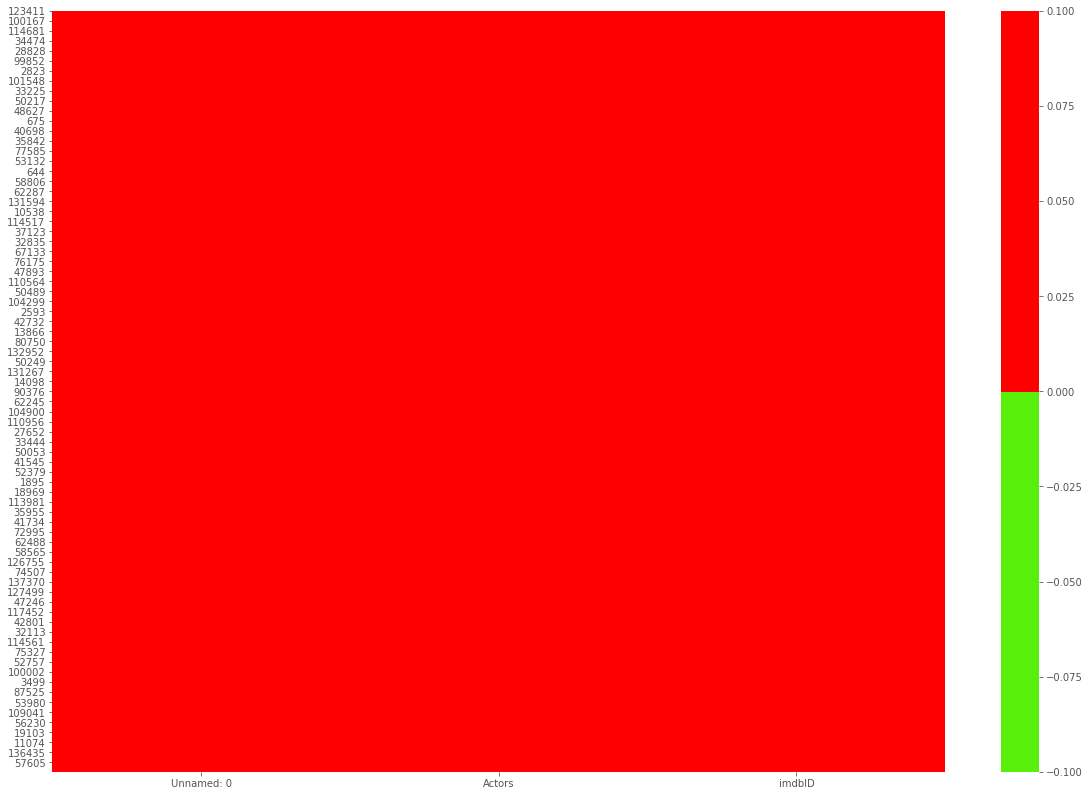

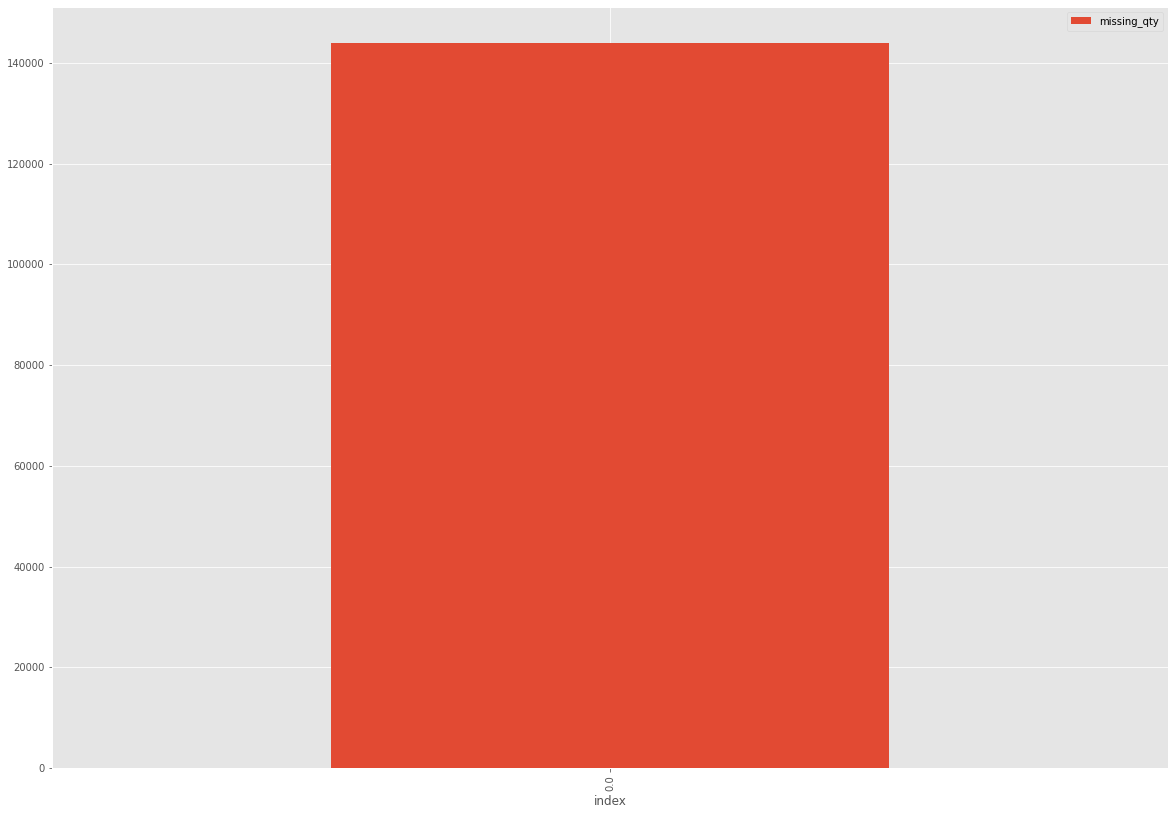

In [9]:
# Sort values and check if there might be repeated
actors_df = actors_df.sort_values(by='Actors')

DataframeHelper.get_overview(actors_df, 'actors')
DataframeHelper.get_report(actors_df, 'actors', row_qty=50, heatmap=True)
SeriesHelper.report_on_column(actors_df.Actors, bar=False)

#### Actors conlusions:
We can determine here that:
- It has 143.869 entries(rows) and none of them seems to be missing
- On a first look no actors seems to be repeated with different formats, but more insight is required.

### 5. Writers

#################
###  writers  ###

Row quantity:  66164
Col quantity:  4
Col names:  ['Unnamed: 0' 'Person' 'Responsibility' 'imdbID']
###
Types:  Unnamed: 0         int64
Person            object
Responsibility    object
imdbID            object
dtype: object



#######################################
######  WRITERS DATASET OVERVIEW  ######


###  Dataset overview - first 10 lines  ###

   Unnamed: 0               Person Responsibility     imdbID
0           0         Ernest Vajda          story  tt0016750
1           1        Ben F. Wilson       scenario  tt0328410
2           2         Sam-yuk Yoon     screenplay  tt0366512
3           3    Judy Rothman Rofé     screenplay  tt0206367
4           4           E.B. White           book  tt0206367
5           5  Norman Reilly Raine          story  tt0046287
6           6         Steve Fisher     screenplay  tt0046287
7           7         Franz Schulz          story  tt0025597
8           8         Billy Wilder          story  tt0025

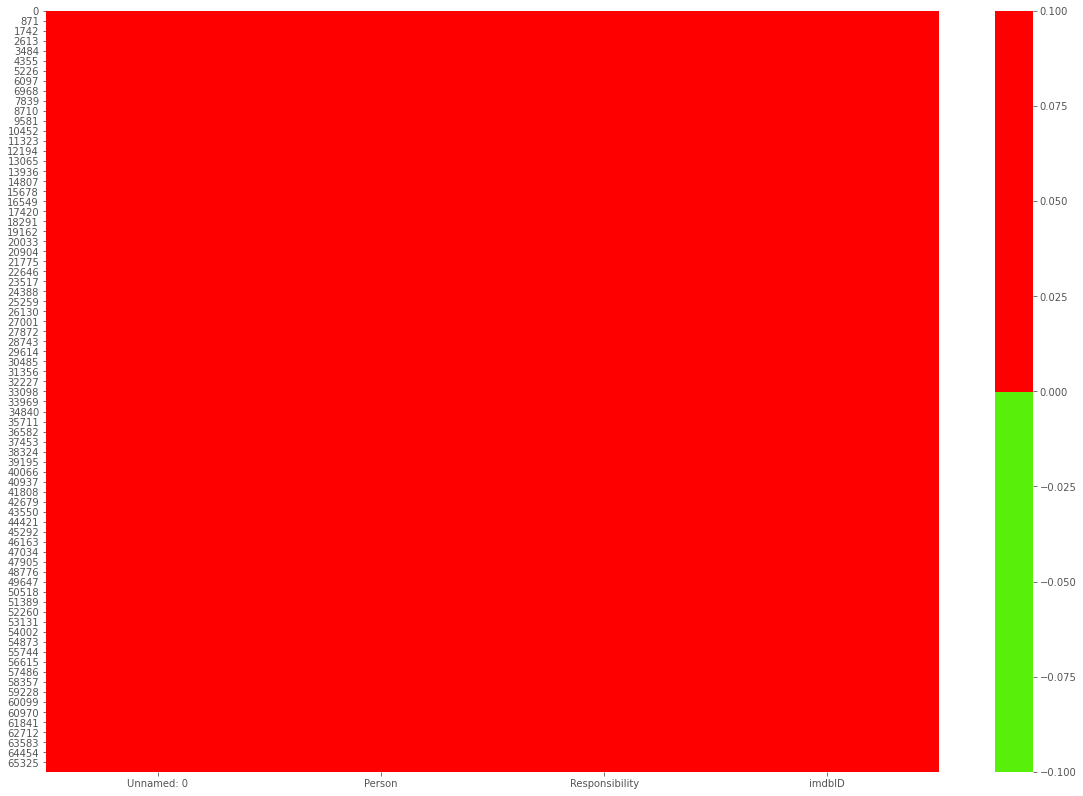

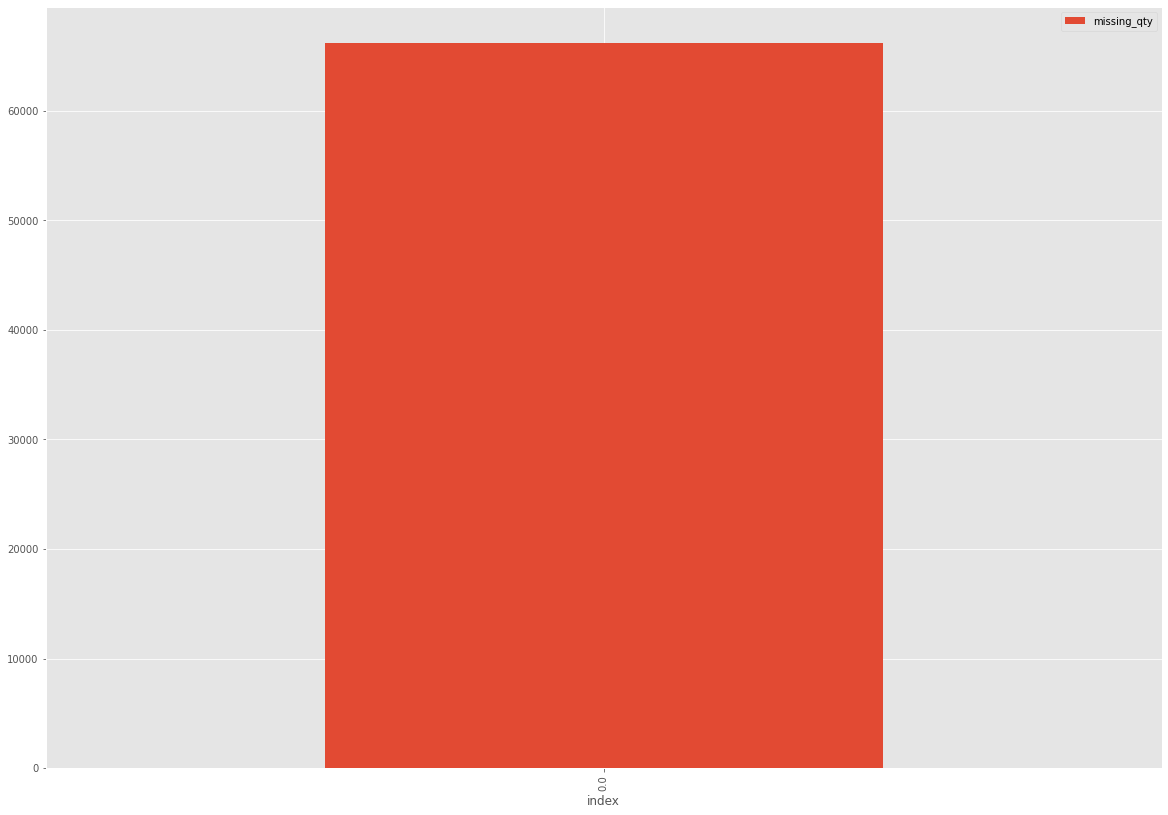

In [10]:

# Sort values and check if there might be repeated
actors_df = writers_df.sort_values(by='Person')

DataframeHelper.get_overview(writers_df, 'writers')
DataframeHelper.get_report(writers_df, 'writers', row_qty=10, heatmap=True)
# SeriesHelper.report_on_column(writers_df.Person, bar=False)
# SeriesHelper.report_on_column(writers_df.Responsibility, bar=False) # bar to true won't help as it isnot column isnot cleaned at all.

writers_df.Responsibility = writers_df.Responsibility.astype('category')
for category in writers_df.Responsibility.cat.categories:
    print(category)

#### Writers conlusions:
We can determine here that:
- It has 66.164 entries(rows) and none of them seems to be missing
- On a first look no actors seems to be repeated with different formats, but more insight is required.
- Column writers' "Responsibility" needs to be cleaned and standardize if possible.
    Example: some of the responsibilities
        - translation: English
        - translation: German
        - translation: German version
        - translated by
        - translation
        - translator
        - translation and adaptation
        - transitions "Randy Balsmeyer"
    Conclusion on responsibility:
        - It requires a deep analysis how to treat the standarization of the language used as many words used mean the same like "translator" or "translated by". A library like NLT for natural language processing could be used with a metric on the distance in order to find how far or how different they are.
        - Dataset here definitely needs to be splitted in difrerent tables as the complexity of features exceeds or categories taken into account are far interconnected and have more than one responsibility and even connected to a another film. e.g.
            - story and script
            - story and written by
            - story consultant
            - story designer
            - story idea
            - story inspired by "the Snow Queen"
         - For now as the responsibility is not a relevant field to prepare an analysis it will be left as is!